# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [3]:
filepath = 'https://raw.githubusercontent.com/Pieter414/BCCInternProject/main/shopping_behavior_updated.csv'

data = pd.read_csv(filepath, delimiter=',')

# Data Understanding

Tujuan Exploratory Data Analysis (EDA)


1. Memahami Data

2. Identifikasi Anomali

3. Identifikasi Pola dan Tren

4. Eksplorasi Hubungan

- Measure of Central Tendency: mean, median, modus
- Measure of Spread: variabilitas, varian, standar deviasi
- Measure of Distribution: skewness dan kurtosis

## Penjelasan Kolom

**About Dataset**

> Context:
The Consumer Behavior and Shopping Habits Dataset provides comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency, and online/offline shopping behavior. With this rich collection of data, analysts and researchers can delve into the intricacies of consumer decision-making processes, aiding businesses in crafting targeted marketing strategies, optimizing product offerings, and enhancing overall customer satisfaction. This dataset is essential for businesses aiming to tailor their strategies to meet customer needs and enhance their shopping experience, ultimately driving sales and loyalty.

**Dataset Glossary (Column-wise)**

> `Customer ID`: A unique identifier assigned to each individual customer, facilitating tracking and analysis of their shopping behavior over time.

> `Age`: The age of the customer, providing demographic information for segmentation and targeted marketing strategies.

> `Gender`: The gender identification of the customer, a key demographic variable influencing product preferences and purchasing patterns.

> `Item Purchased`: The specific product or item selected by the customer during the transaction.

> `Category`: The broad classification or group to which the purchased item belongs (e.g., clothing, electronics, groceries).

> `Purchase Amount (USD)`: The monetary value of the transaction, denoted in United States Dollars (USD), indicates the cost of the purchased item(s).

> `Location`: The geographical location where the purchase was made, offering insights into regional preferences and market trends.

> `Size`: The size specification (if applicable) of the purchased item, relevant for apparel, footwear, and certain consumer goods.

> `Color`: The color variant or choice associated with the purchased item, influencing customer preferences and product availability.

> `Season`: The seasonal relevance of the purchased item (e.g., spring, summer, fall, winter), impacting inventory management and marketing strategies.

> `Review Rating`: A numerical or qualitative assessment provided by the customer regarding their satisfaction with the purchased item.

> `Subscription Status`: Indicates whether the customer has opted for a subscription service, offering insights into their level of loyalty and potential for recurring revenue.

> `Shipping Type`: Specifies the method used to deliver the purchased item (e.g., standard shipping, express delivery), influencing delivery times and costs.

> `Discount Applied`: Indicates if any promotional discounts were applied to the purchase, shedding light on price sensitivity and promotion effectiveness.

> `Promo Code Used`: Notes whether a promotional code or coupon was utilized during the transaction, aiding in the evaluation of marketing campaign success.

> `Previous Purchases`: Provides information on the number or frequency of prior purchases made by the customer, contributing to customer segmentation and retention strategies.

> `Payment Method`: Specifies the mode of payment employed by the customer (e.g., credit card, cash), offering insights into preferred payment options.

> `Frequency of Purchases`: Indicates how often the customer engages in purchasing activities, a critical metric for assessing customer loyalty and lifetime value.

## Data overview

In [4]:
data.head(10)

Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse     Clothing                     53   
1            2   19   Male        Sweater     Clothing                     64   
2            3   50   Male          Jeans     Clothing                     73   
3            4   21   Male        Sandals     Footwear                     90   
4            5   45   Male         Blouse     Clothing                     49   
5            6   46   Male       Sneakers     Footwear                     20   
6            7   63   Male          Shirt     Clothing                     85   
7            8   27   Male         Shorts     Clothing                     34   
8            9   26   Male           Coat    Outerwear                     97   
9           10   57   Male        Handbag  Accessories                     31   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   
5        Wyoming    M      White  Summer            2.9                 Yes   
6        Montana    M       Gray    Fall            3.2                 Yes   
7      Louisiana    L   Charcoal  Winter            3.2                 Yes   
8  West Virginia    L     Silver  Summer            2.6                 Yes   
9       Missouri    M       Pink  Spring            4.8                 Yes   

    Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0         Express              Yes             Yes                  14   
1         Express              Yes             Yes                   2   
2   Free Shipping              Yes             Yes                  23   
3    Next Day Air              Yes             Yes                  49   
4   Free Shipping              Yes             Yes                  31   
5        Standard              Yes             Yes                  14   
6   Free Shipping              Yes             Yes                  49   
7   Free Shipping              Yes             Yes                  19   
8         Express              Yes             Yes                   8   
9  2-Day Shipping              Yes             Yes                   4   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually  
5          Venmo                 Weekly  
6           Cash              Quarterly  
7    Credit Card                 Weekly  
8          Venmo               Annually  
9           Cash              Quarterly

In [5]:
data.tail(10)

Customer ID  Age  Gender Item Purchased     Category  \
3890         3891   35  Female          Shirt     Clothing   
3891         3892   36  Female          Dress     Clothing   
3892         3893   35  Female        Jewelry  Accessories   
3893         3894   21  Female            Hat  Accessories   
3894         3895   66  Female          Skirt     Clothing   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
3890                     81       Nebraska   XL      Green  Winter   
3891                     30       Colorado    L      Peach  Winter   
3892                     86       Michigan    L     Indigo  Summer   
3893                     64  Massachusetts    L      White    Fall   
3894                     78    Connecticut    L      White  Spring   
3895                     28       Virginia    L  Turquoise  Summer   
3896                     49           Iowa    L      White  Spring   
3897                     33     New Jersey    L      Green  Spring   
3898                     77      Minnesota    S      Brown  Summer   
3899                     81     California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
3890            2.6                  No        Standard               No   
3891            4.7                  No   Free Shipping               No   
3892            3.5                  No        Standard               No   
3893            3.3                  No    Store Pickup               No   
3894            3.9                  No  2-Day Shipping               No   
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3890              No                  33     Debit Card               Annually  
3891              No                   6  Bank Transfer              Quarterly  
3892              No                   5         PayPal            Fortnightly  
3893              No                  29  Bank Transfer              Bi-Weekly  
3894              No                  44    Credit Card         Every 3 Months  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly

In [6]:
data.shape

(3900, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [9]:
data.describe(include="all")

Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique                    NaN       50     4     25       4            NaN   
top                       NaN  Montana     M  Olive  Spring            NaN   
freq                      NaN       96  1755    177     999            NaN   
mean                59.764359      NaN   NaN    NaN     NaN       3.749949   
std                 23.685392      NaN   NaN    NaN     NaN       0.716223   
min                 20.000000      NaN   NaN    NaN     NaN       2.500000   
25%                 39.000000      NaN   NaN    NaN     NaN       3.100000   
50%                 60.000000      NaN   NaN    NaN     NaN       3.700000   
75%                 81.000000      NaN   NaN    NaN     NaN       4.400000   
max                100.000000      NaN   NaN    NaN     NaN       5.000000   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   
mean                   NaN            NaN              NaN             NaN   
std                    NaN            NaN              NaN             NaN   
min                    NaN            NaN              NaN             NaN   
25%                    NaN            NaN              NaN             NaN   
50%                    NaN            NaN              NaN             NaN   
75%                    NaN            NaN              NaN             NaN   
max                    NaN            NaN              NaN             NaN   

        Previous Purchases Payment Method Frequency of Purchases  
count          3900.000000           3900                   3900  
unique                 NaN              6                      7  
top                    NaN         PayPal         Every 3 Months  
freq                   NaN            677                    584  
mean             25.351538            NaN                    NaN  
std              14.447125            NaN                    NaN  
min               1.000000            NaN                    NaN  
25%              13.000000            NaN                    NaN  
50%              25.000000            NaN                    NaN  
75%              38.000000            NaN                    NaN  
max              50.000000            NaN                    NaN

In [10]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Analisis Value Counts (Persebaran Data)

Pertama, ambil terlebih dahulu semua kolom object

In [11]:
def show_value_count(data, label):
  value_count = data[label].value_counts()

  print(f"\nPersebaran dari kolom {label}: \n{value_count}")

In [12]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases']

In [13]:
integer_columns = column_types[column_types == 'int64'].index.tolist()
integer_columns

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Previous Purchases']

In [14]:
float_columns = column_types[column_types == 'float64'].index.tolist()
float_columns

['Review Rating']

In [15]:
show_value_count(data, 'Item Purchased')


Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64


In [16]:
for column in object_columns:
  show_value_count(data, column)


Persebaran dari kolom Gender: 
Male      2652
Female    1248
Name: Gender, dtype: int64

Persebaran dari kolom Item Purchased: 
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

Persebaran dari kolom Category: 
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Persebaran dari kolom Location: 
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86

In [17]:
for column in float_columns:
  show_value_count(data, column)


Persebaran dari kolom Review Rating: 
3.4    182
4.0    181
4.6    174
4.2    171
2.9    170
4.9    166
3.9    163
3.0    162
2.6    159
4.4    158
3.1    157
3.7    156
3.5    156
2.7    154
3.3    152
3.2    152
3.6    149
4.7    148
4.1    148
4.3    147
4.8    144
3.8    142
4.5    139
2.8    136
5.0     68
2.5     66
Name: Review Rating, dtype: int64


In [18]:
for column in integer_columns:
  show_value_count(data, column)


Persebaran dari kolom Customer ID: 
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64

Persebaran dari kolom Age: 
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

Persebaran dari kolom Purchase Amount (USD): 
94     62
32     62
36     62
51     61
90     60
       ..
100    36
87     35
49     35
69     34
61     33
Name: Purchase Amount (USD), Length: 81, dtype: int64

Persebaran dari kolom Previous Purchases: 
31    97
21    96
14  

## Missing Values

In [19]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Disimpulkan bahwa dataset ini tidak memiliki missing value di kolom manapun

## Duplicated values

In [20]:
data.duplicated().sum()

0

In [21]:
duplicate_without_id = (data.drop(columns=["Customer ID"]))
duplicate_without_id.duplicated().sum()

0

In [22]:
data[data.duplicated()]

Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

In [23]:
duplicate_without_id[duplicate_without_id.duplicated()]

Empty DataFrame
Columns: [Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Payment Method, Frequency of Purchases]
Index: []

Dari diatas, ditemukan bahwa tidak ada data yang duplikat. Bahkan setelah mengecek data tanpa Customer ID, ditemukan tidak ada duplikat

# Business Question / Insight

SMART Method

- Specific
- Measurable
- Action Oriented
- Relevant
- Time Bound

Business Insights

1. Spesific :
2. Measurable :
3. Action Oriented
4. Relevant :
5. Time Bound : This project final presentation are in 23 March 2024

Business Questions:

1. Bagaimana customer habits and behavior berdasarkan wilayah regional mereka (Dalam Amerika Serikat)
2. ?
3. ?

# Pre Visualization and Analysis

Creating numerical data, categorical data and creating new column that maybe be usefull

## Num Data

In [24]:
num_data = data.filter(integer_columns+float_columns)
num_data.head()

Customer ID  Age  Purchase Amount (USD)  Previous Purchases  Review Rating
0            1   55                     53                  14            3.1
1            2   19                     64                   2            3.1
2            3   50                     73                  23            3.1
3            4   21                     90                  49            3.5
4            5   45                     49                  31            2.7

## Region Grouping

In [25]:
regions = {
    'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
    'Mideast': ['Delaware', 'District of Columbia', 'Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
    'Great Lakes': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'],
    'Plains': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'Southeast': ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    'Southwest': ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Rocky Mountain': ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
    'Far West': ['Alaska', 'California', 'Hawaii', 'Nevada', 'Oregon', 'Washington']
}

In [26]:
# Fungsi untuk menentukan region
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

In [27]:
# Menambahkan kolom region ke dataframe
data['Region'] = data['Location'].apply(get_region)

data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region  
0          Venmo            Fortnightly    Southeast  
1           Cash            Fortnightly  New England  
2    Credit Card                 Weekly  New England  
3         PayPal                 Weekly  New England  
4         PayPal               Annually     Far West

In [28]:
data.to_csv('data.csv', index=False)

In [29]:
data["Region"].value_counts()

Southeast         947
Plains            541
Far West          466
New England       446
Rocky Mountain    406
Mideast           400
Great Lakes       396
Southwest         298
Name: Region, dtype: int64

In [30]:
column_types = data.dtypes
object_columns = column_types[column_types == 'object'].index.tolist()

object_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Payment Method',
 'Frequency of Purchases',
 'Region']

In [31]:
category_data = data.filter(object_columns)
category_data.head()

Gender Item Purchased  Category       Location Size      Color  Season  \
0   Male         Blouse  Clothing       Kentucky    L       Gray  Winter   
1   Male        Sweater  Clothing          Maine    L     Maroon  Winter   
2   Male          Jeans  Clothing  Massachusetts    S     Maroon  Spring   
3   Male        Sandals  Footwear   Rhode Island    M     Maroon  Spring   
4   Male         Blouse  Clothing         Oregon    M  Turquoise  Spring   

  Subscription Status  Shipping Type Discount Applied Promo Code Used  \
0                 Yes        Express              Yes             Yes   
1                 Yes        Express              Yes             Yes   
2                 Yes  Free Shipping              Yes             Yes   
3                 Yes   Next Day Air              Yes             Yes   
4                 Yes  Free Shipping              Yes             Yes   

  Payment Method Frequency of Purchases       Region  
0          Venmo            Fortnightly    Southeast  
1           Cash            Fortnightly  New England  
2    Credit Card                 Weekly  New England  
3         PayPal                 Weekly  New England  
4         PayPal               Annually     Far West

## Age Grouping

In [32]:
# Define a function to classify age groups
def classify_age_group(age):
    if age <= 19:
        return 'Teenage'
    elif 20 <= age <= 30:
        return 'Younger_Adult'
    elif 31 <= age <= 59:
        return 'Adult'
    else:
        return 'Older_Adult'

# Apply the function to create a new column 'Age_group'
data['Age Group'] = data['Age'].apply(classify_age_group)

In [33]:
data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases       Region      Age Group  
0          Venmo            Fortnightly    Southeast          Adult  
1           Cash            Fortnightly  New England        Teenage  
2    Credit Card                 Weekly  New England          Adult  
3         PayPal                 Weekly  New England  Younger_Adult  
4         PayPal               Annually     Far West          Adult

# EDA (Explorative Data Analysis)

## Mengecek kolom numerik akan outlier, median, kuartil dan lainnya (Box plot)

In [34]:
def boxplot_of_purchase(obj_column, int_column="Purchase Amount (USD)", title=""):
  plt.figure(figsize=(12, 8))
  sns.set(style="darkgrid")
  ax = sns.boxplot(y=obj_column, x=int_column, data=data, palette="Set1")
  plt.title(title, fontsize=16)
  plt.show()

<ipython-input-34-27f8dd03a35d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=obj_column, x=int_column, data=data, palette="Set1")


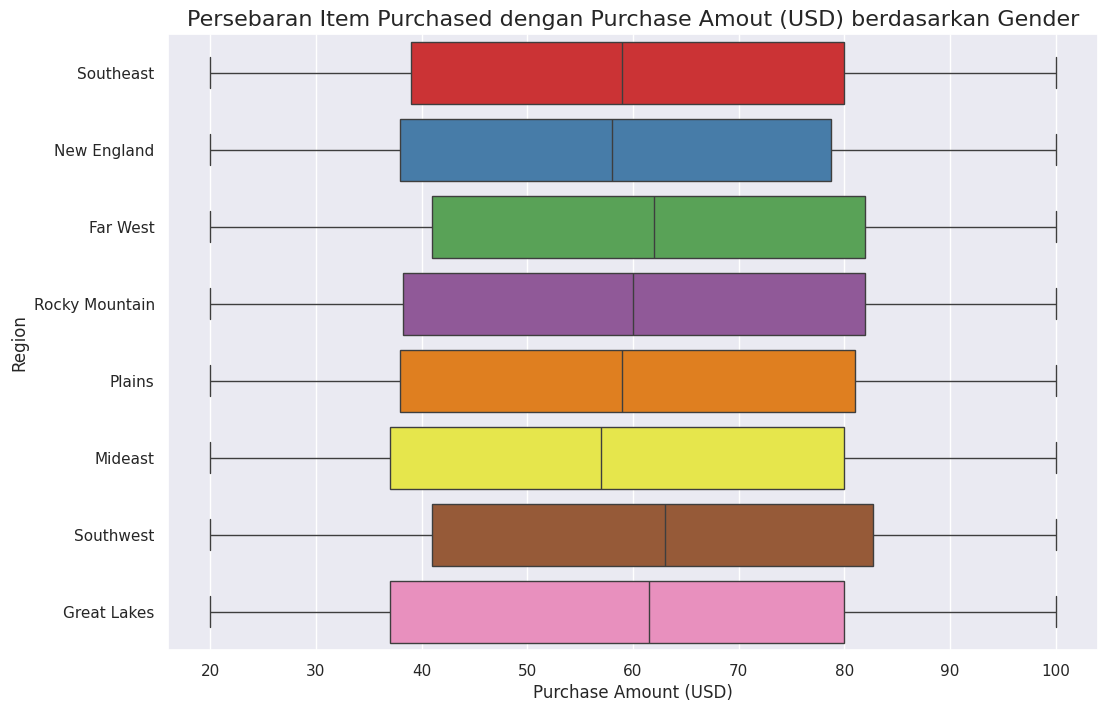

In [35]:
for column in ["Region"]:
  boxplot_of_purchase(column, title="Persebaran Item Purchased dengan Purchase Amout (USD) berdasarkan Gender")

<ipython-input-34-27f8dd03a35d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=obj_column, x=int_column, data=data, palette="Set1")


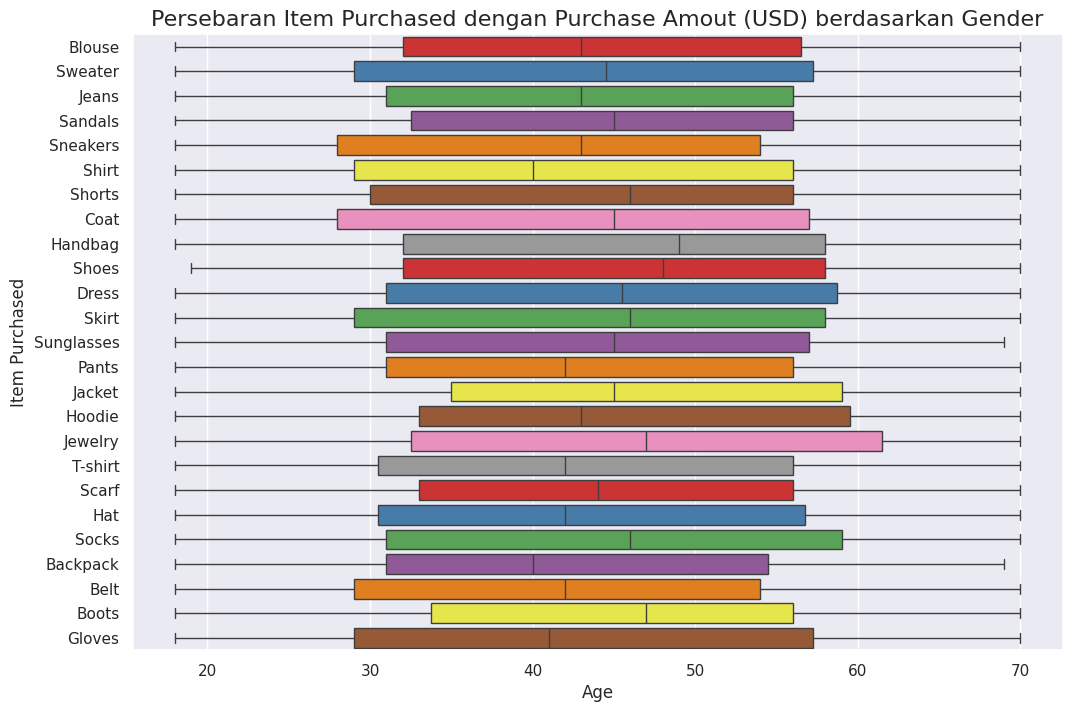

In [36]:
for column in ["Item Purchased"]:
  boxplot_of_purchase(column, "Age", title="Persebaran Item Purchased dengan Purchase Amout (USD) berdasarkan Gender")

<ipython-input-34-27f8dd03a35d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=obj_column, x=int_column, data=data, palette="Set1")


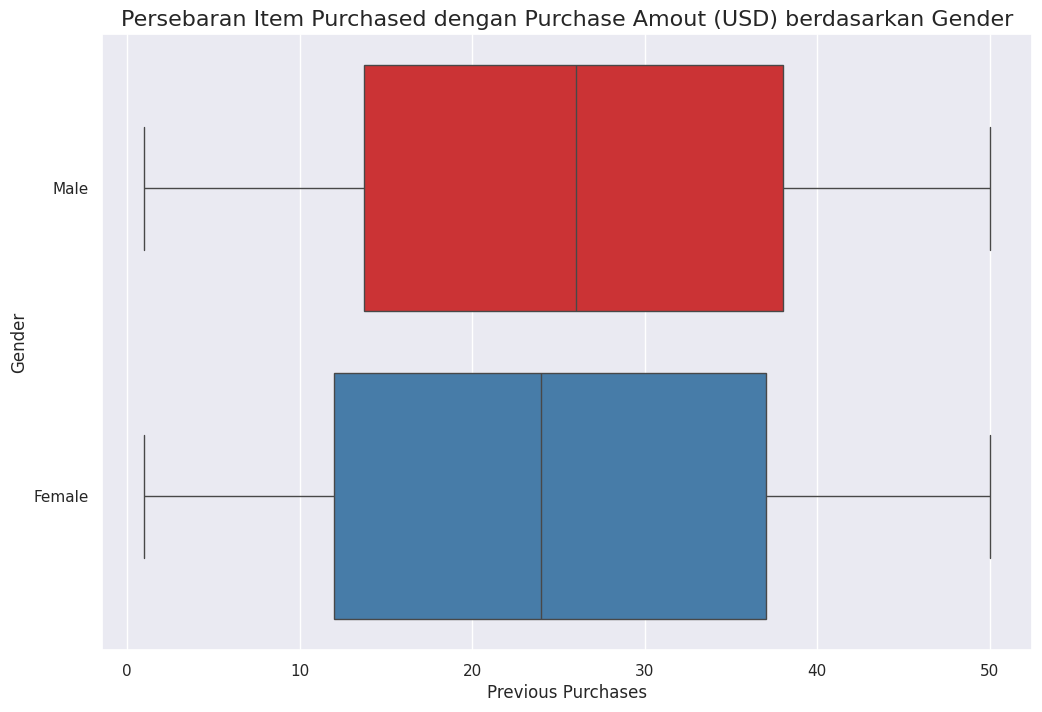

In [37]:
for column in ["Gender"]:
  boxplot_of_purchase(column, "Previous Purchases", title="Persebaran Item Purchased dengan Purchase Amout (USD) berdasarkan Gender")

## Distribusi kolom numerik yang diklasifikasi berdasarkan Gender (Histogram)

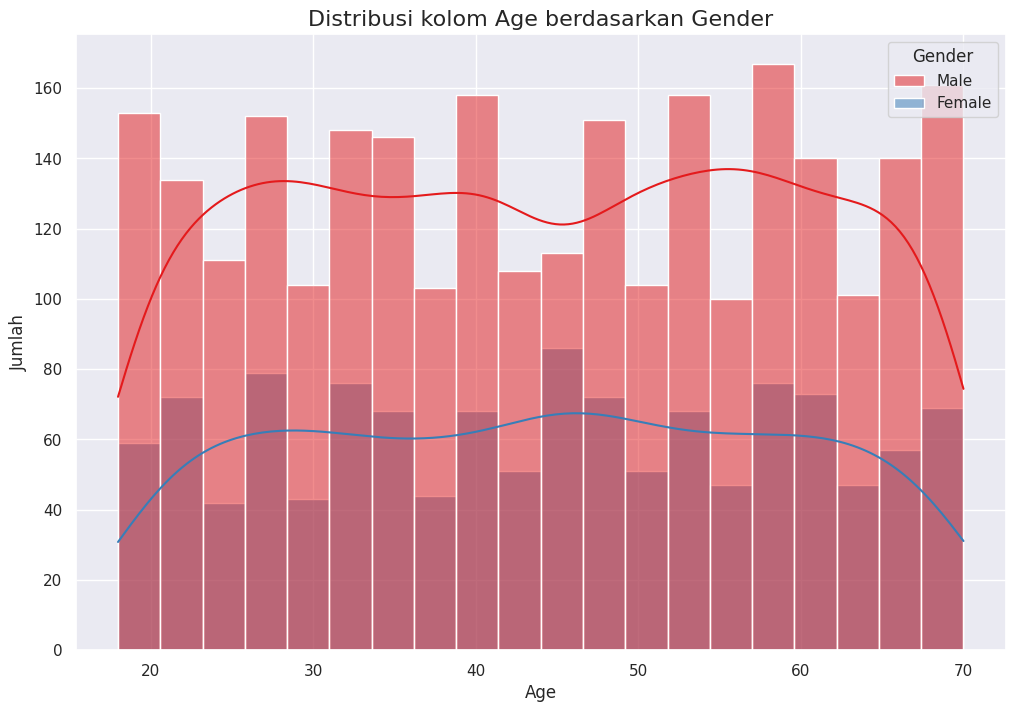

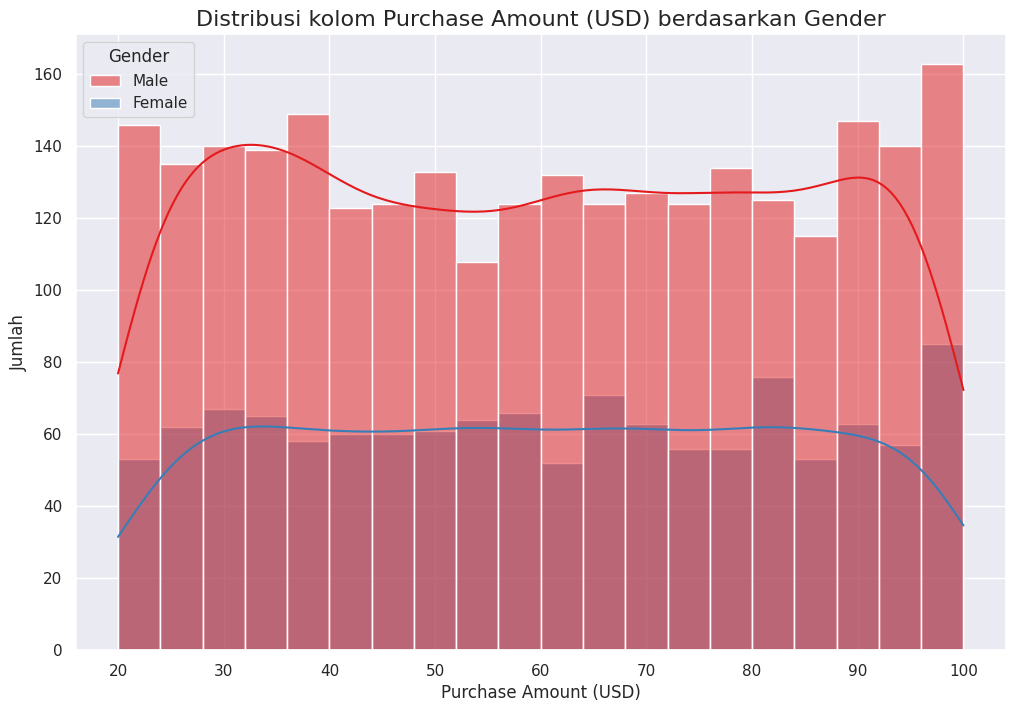

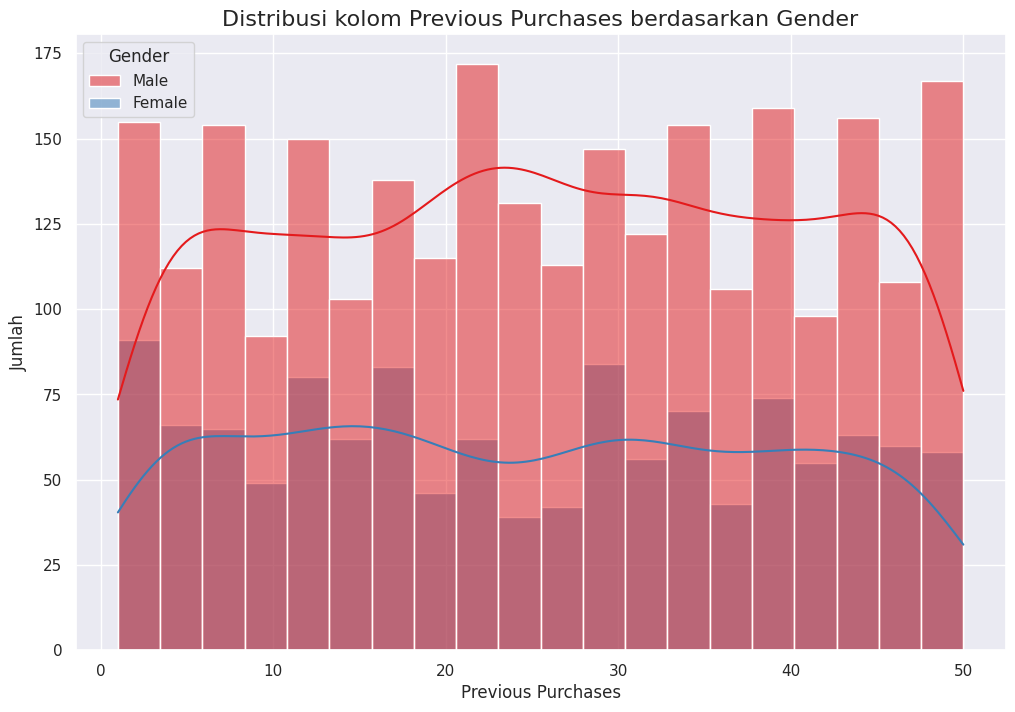

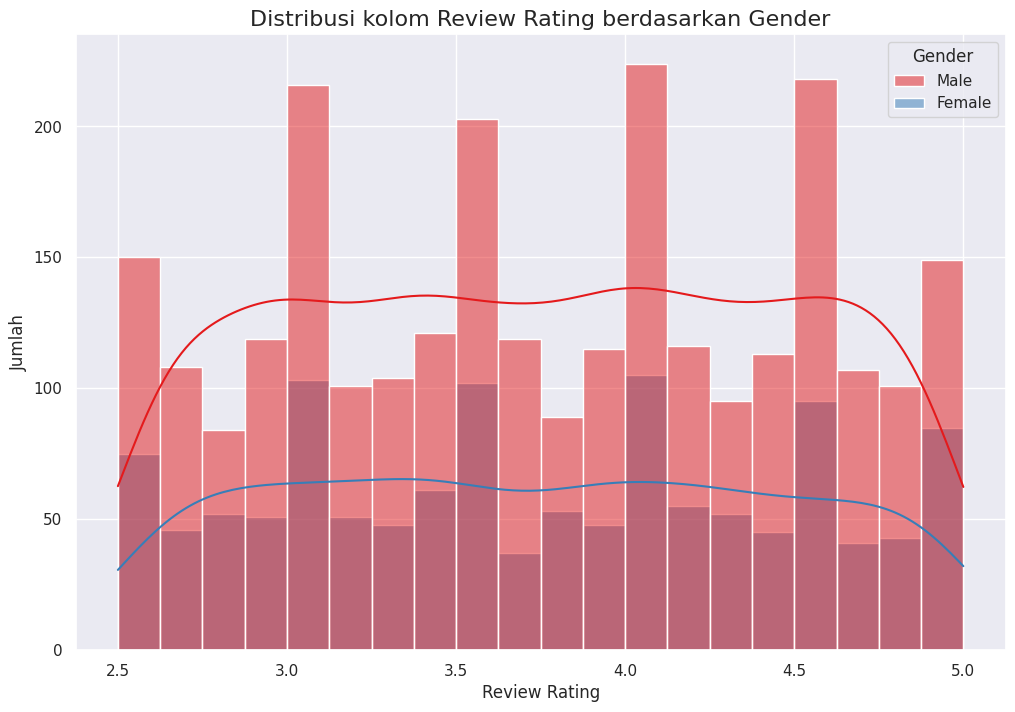

In [38]:
for column in num_data:
  if column == "Customer ID":
    continue
  plt.figure(figsize=(12, 8))
  plt.title(f"Distribusi kolom {column} berdasarkan Gender", fontsize=16)
  sns.histplot(data=data, x=column, hue='Gender', bins=20, kde=True, palette="Set1")
  plt.xlabel(column, fontsize=12)
  plt.ylabel("Jumlah", fontsize=12)
  plt.show()

array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Previous Purchases'}>],
       [<Axes: title={'center': 'Review Rating'}>, <Axes: >]],
      dtype=object)

<Figure size 1200x800 with 0 Axes>

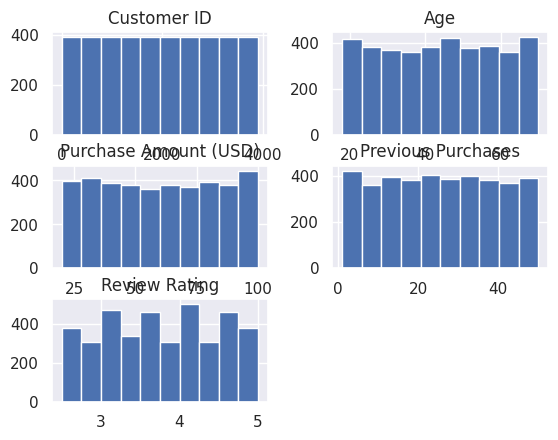

In [50]:
plt.figure(figsize=(12, 8))
num_data.hist()

## Bagaimana korelasi antar kolom numerik (dan kolom boolean) satu sama lain (Heatmap)

<ipython-input-39-0962401c555b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


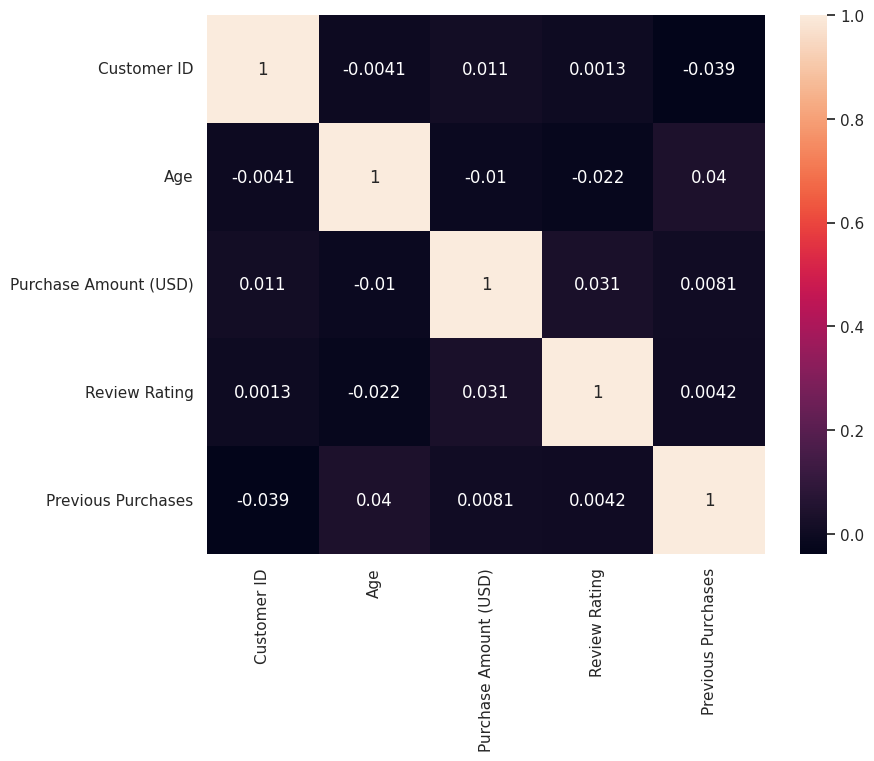

In [39]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(), annot=True);
plt.show()

In [40]:
new_data = data.copy()

In [41]:
gender_mapping = {"Male":1, "Female":0}
new_data["Gender"] = new_data["Gender"].map(gender_mapping)

In [42]:
yes_mapping = {"Yes":1, "No":0}
new_data["Promo Code Used"] = new_data["Promo Code Used"].map(yes_mapping)
new_data["Discount Applied"] = new_data["Discount Applied"].map(yes_mapping)
new_data["Subscription Status"] = new_data["Subscription Status"].map(yes_mapping)

<ipython-input-43-1f739fb468ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_data.corr(), annot=True);


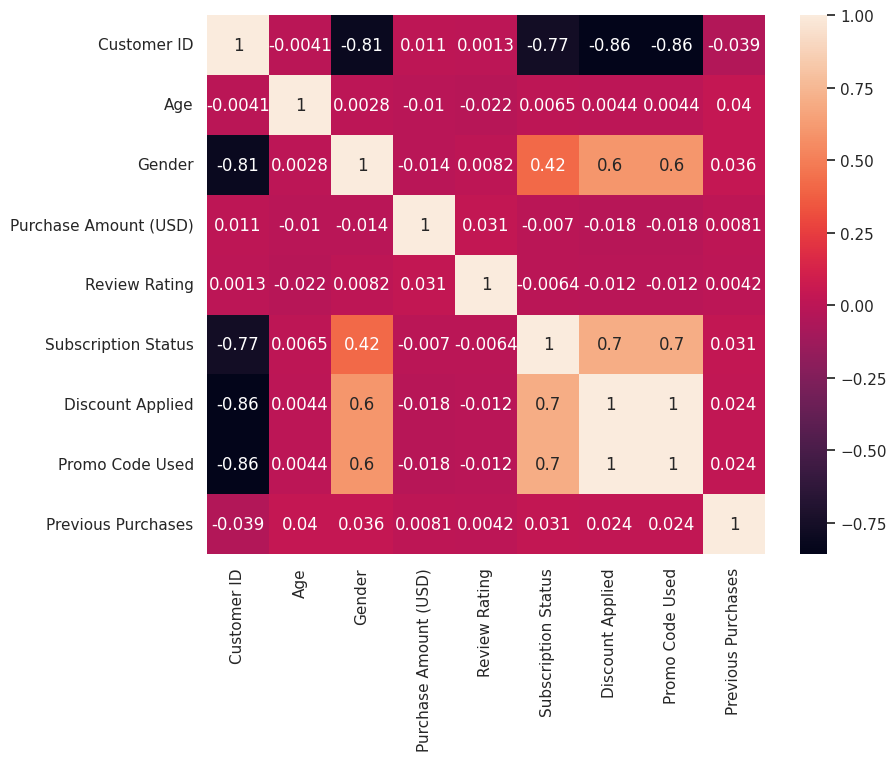

In [43]:
plt.figure(figsize=(9,7))
sns.heatmap(new_data.corr(), annot=True);
plt.show()

## Bagaimana persebaran customer behavior dan habits (Count Plot)

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


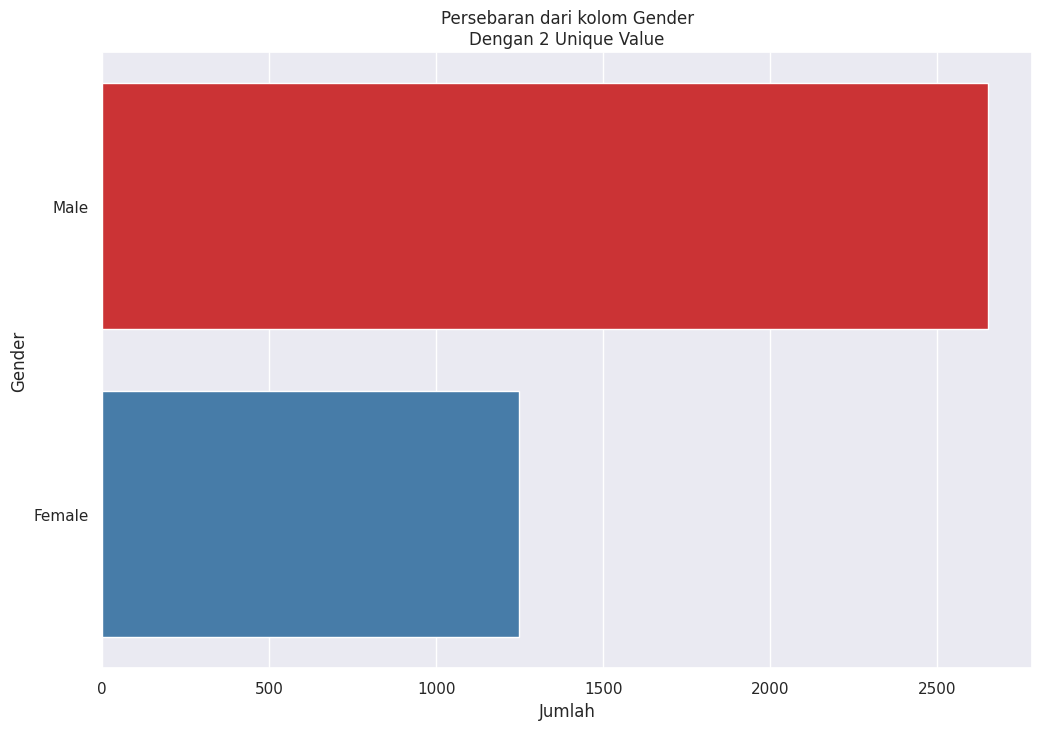

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


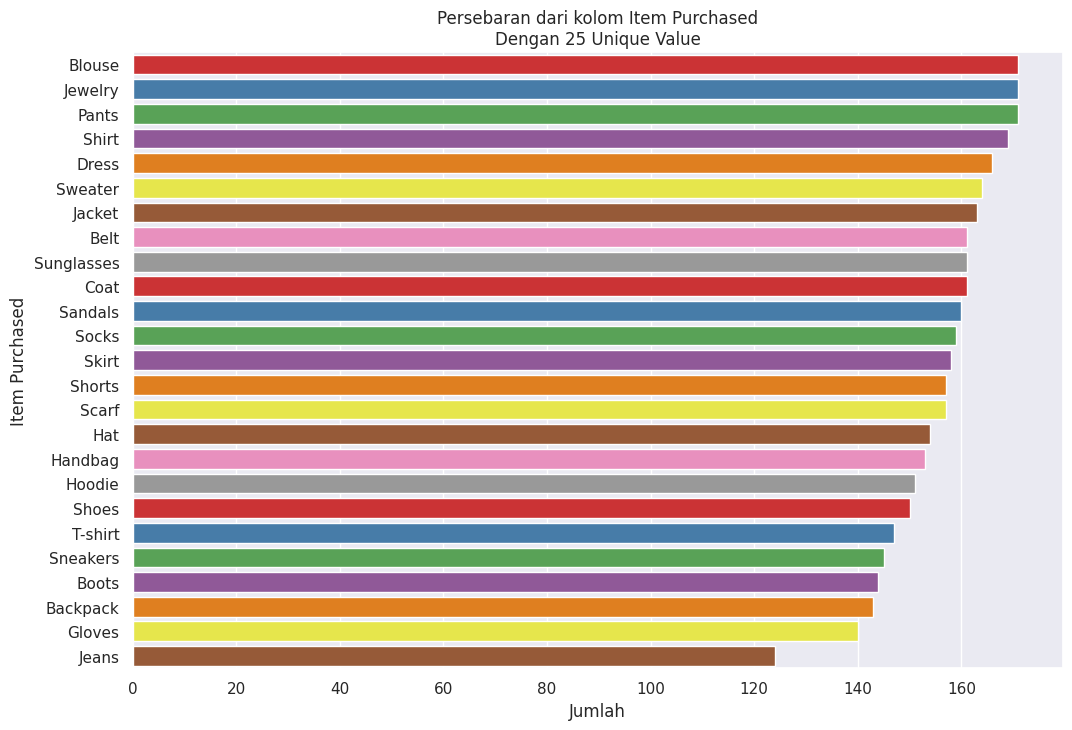

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


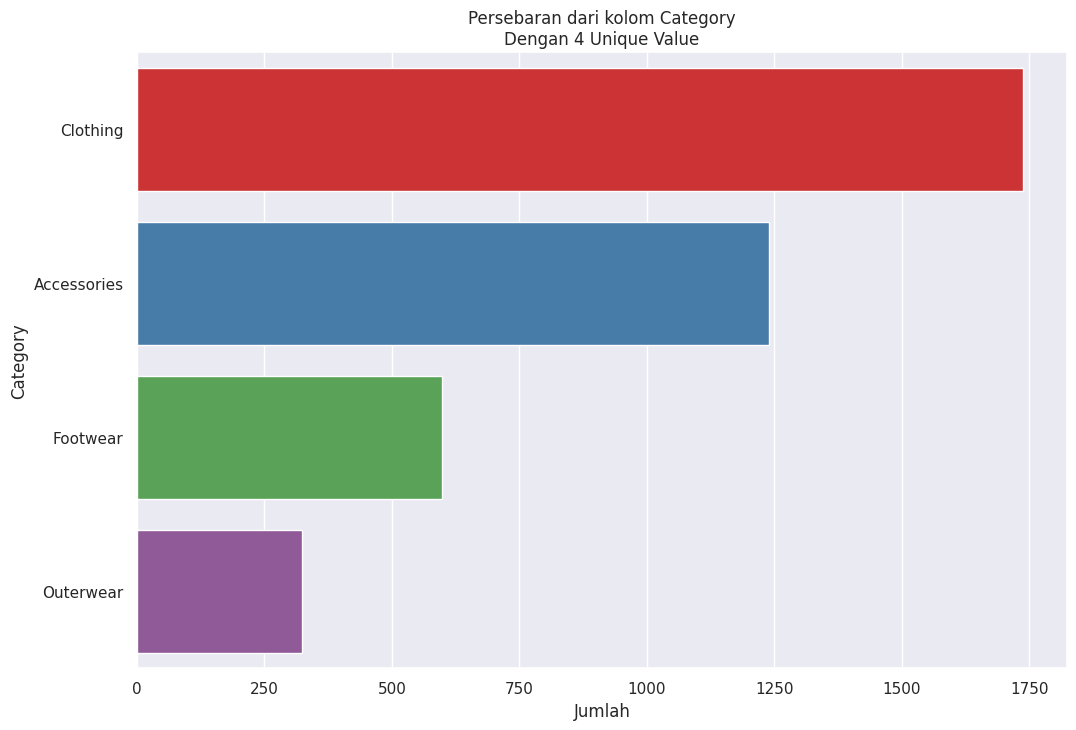

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


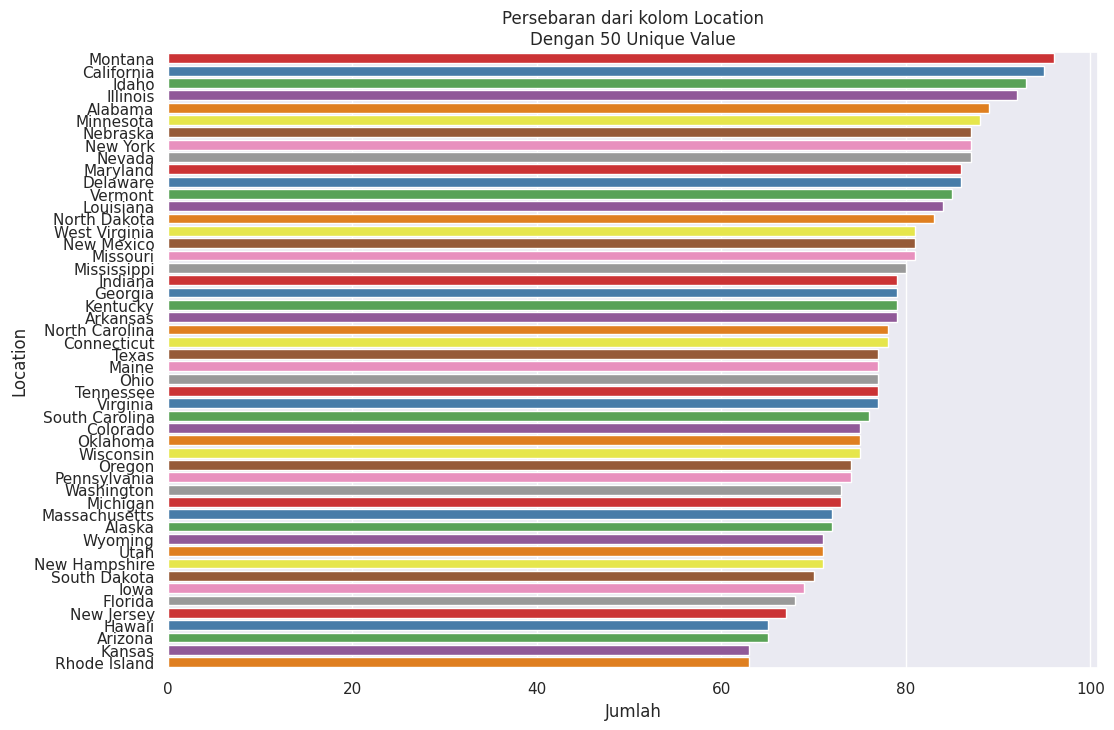

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


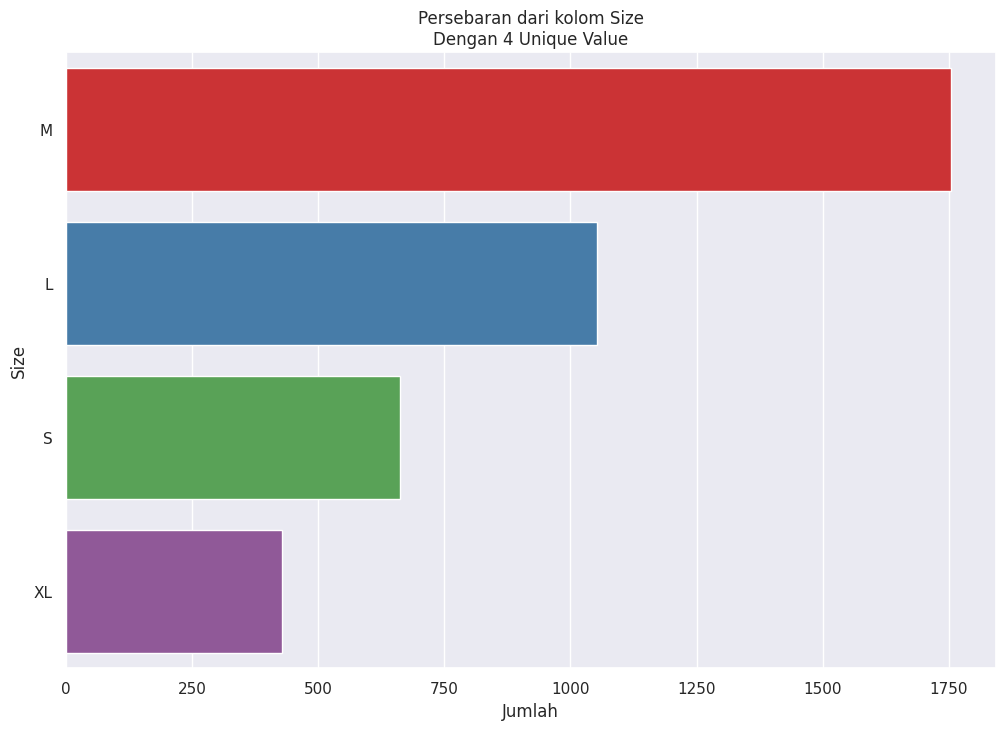

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


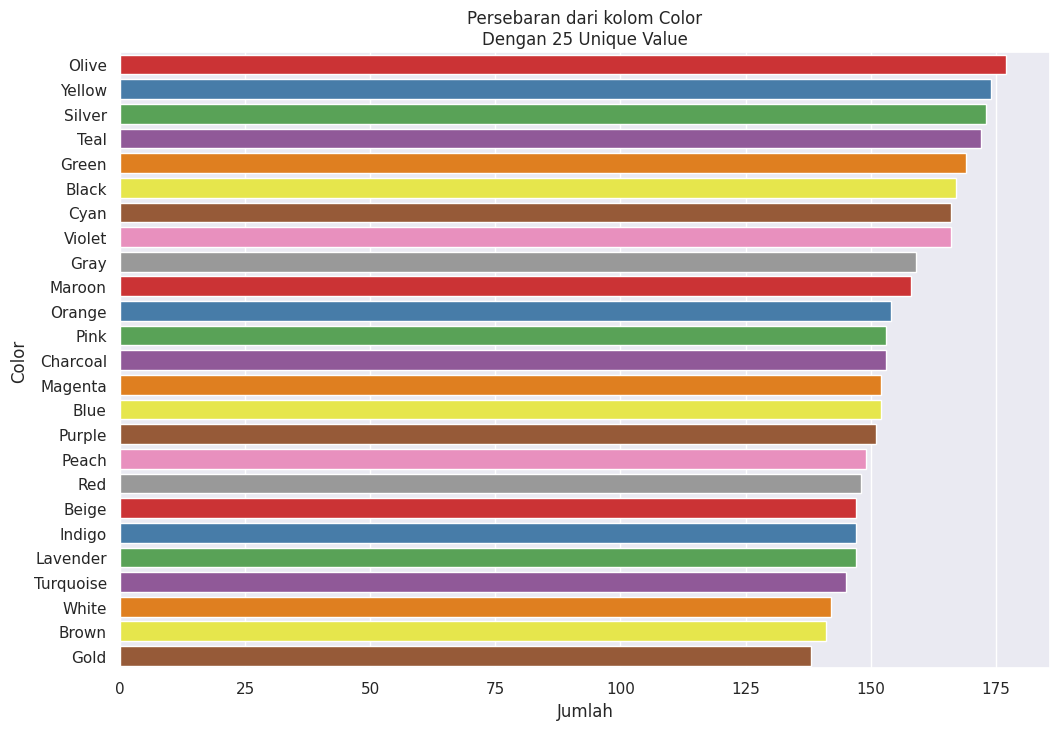

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


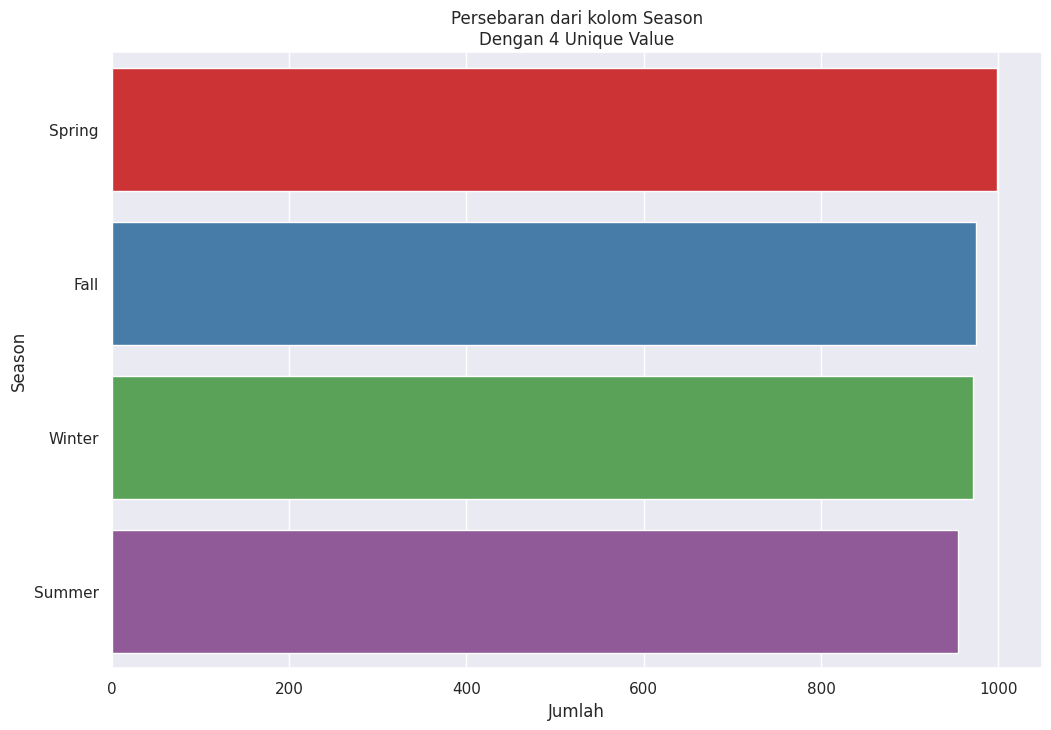

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


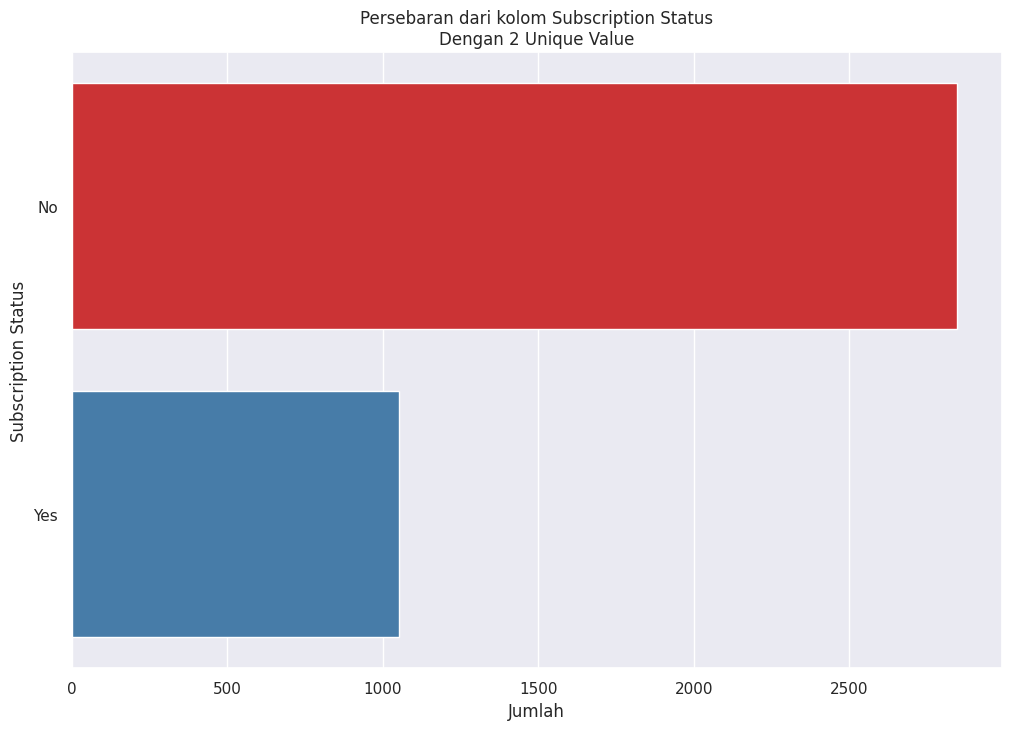

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


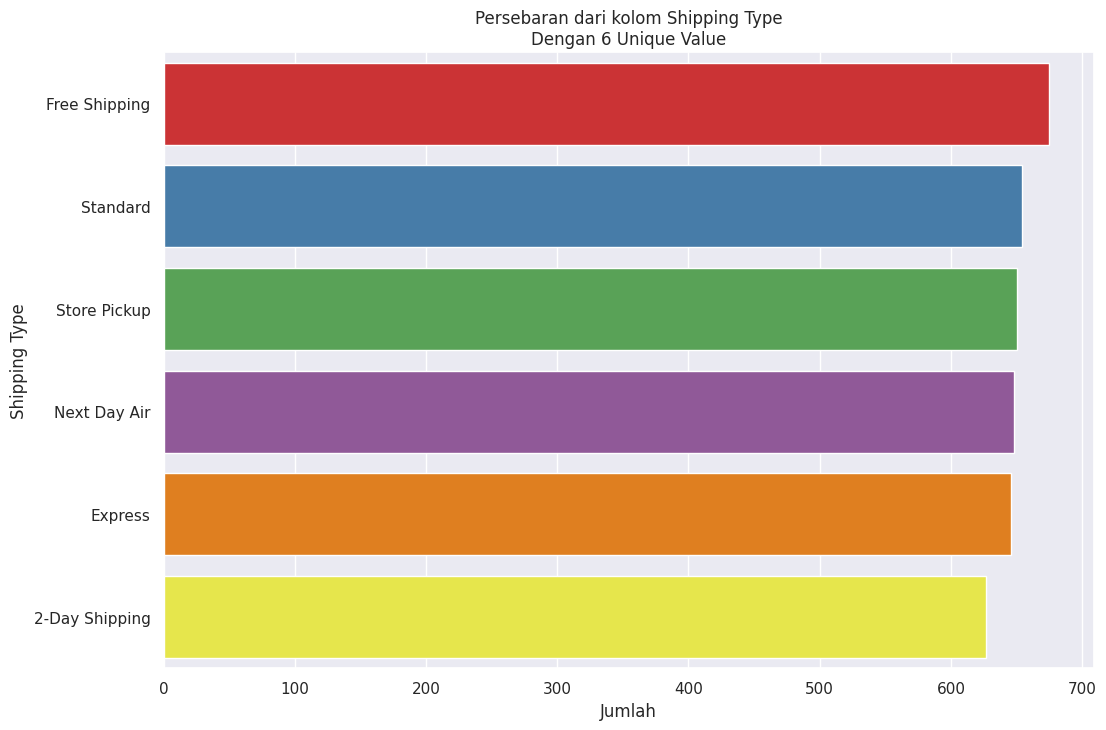

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


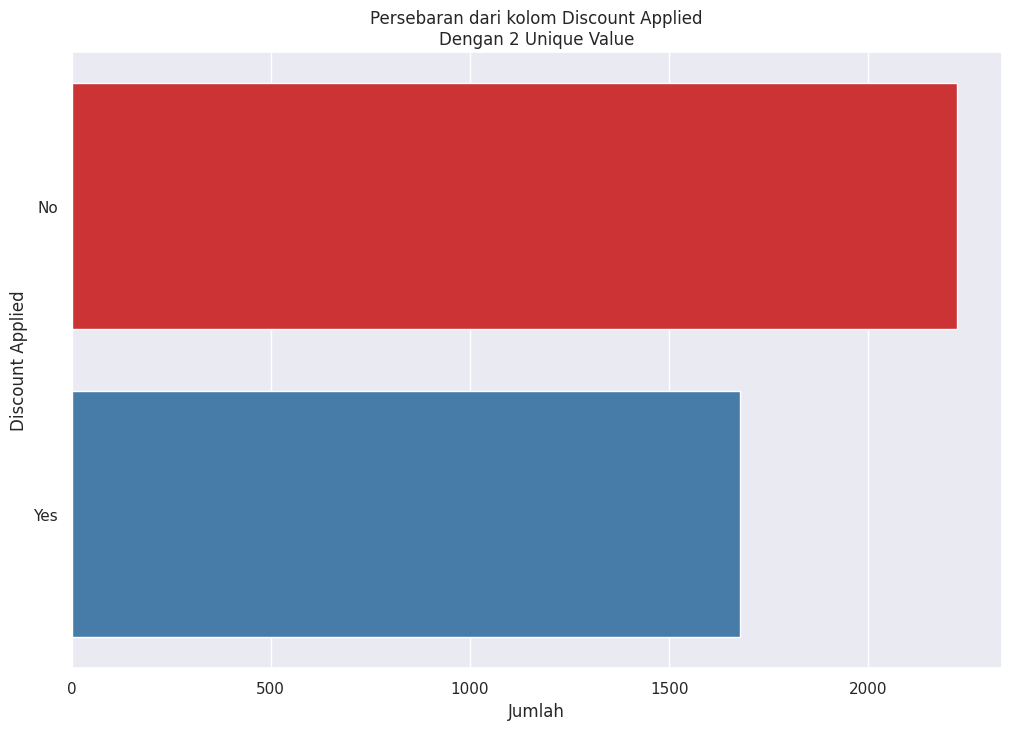

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


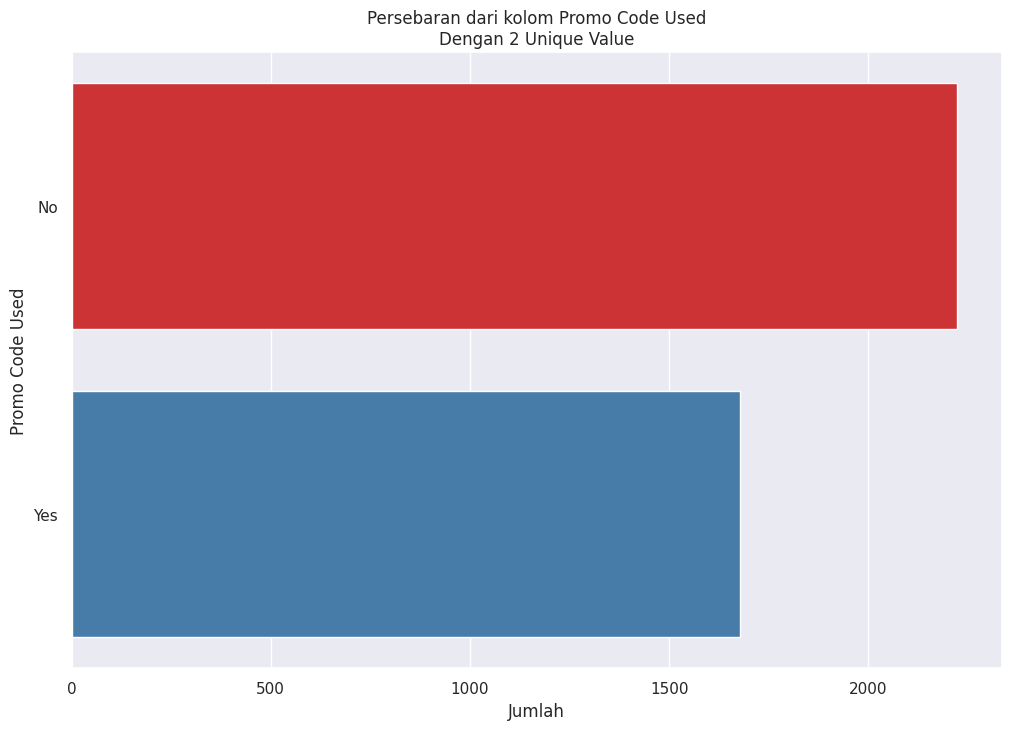

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


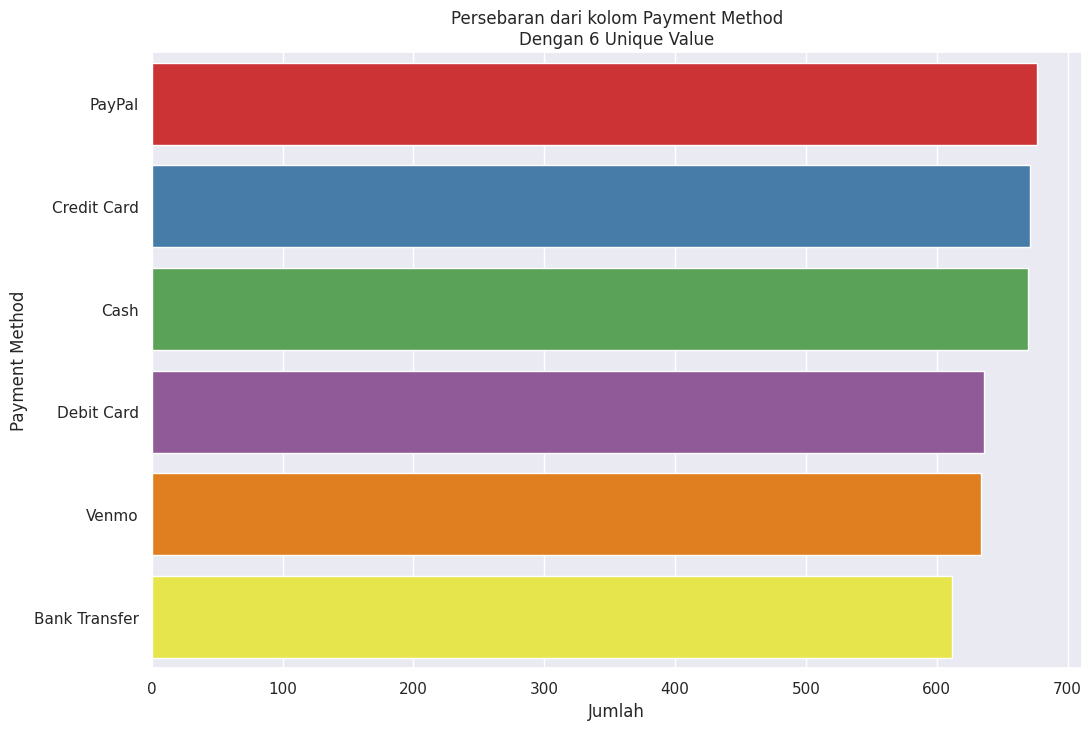

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


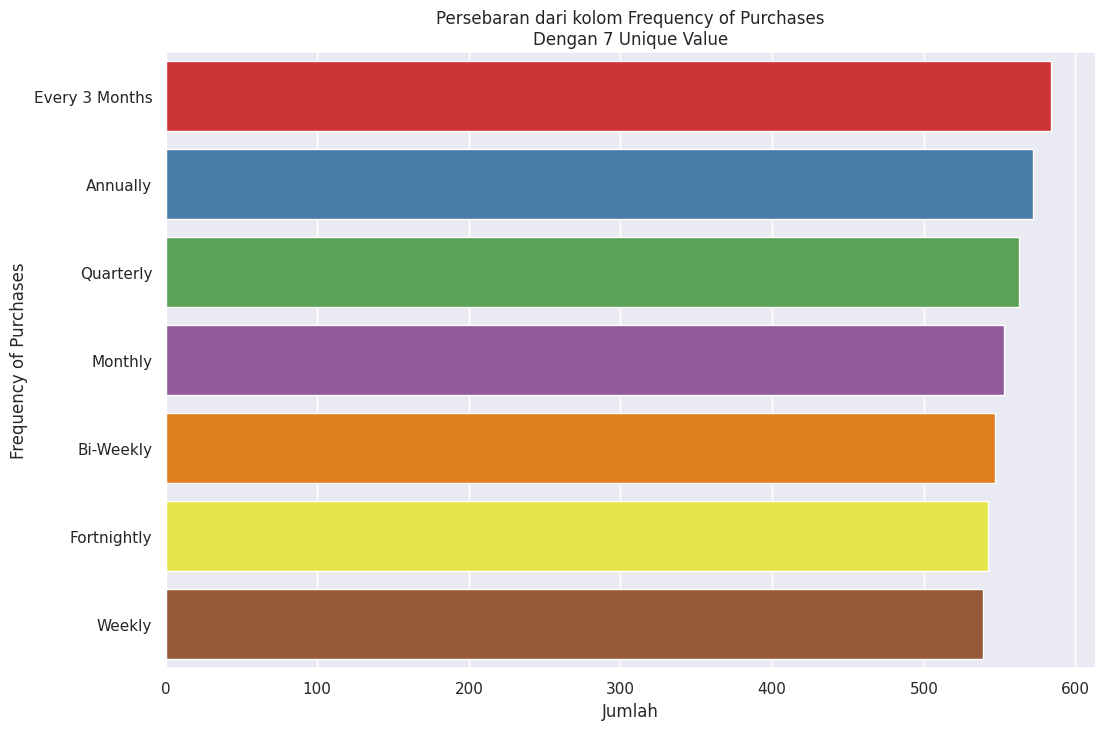

<ipython-input-44-80280315fdcb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


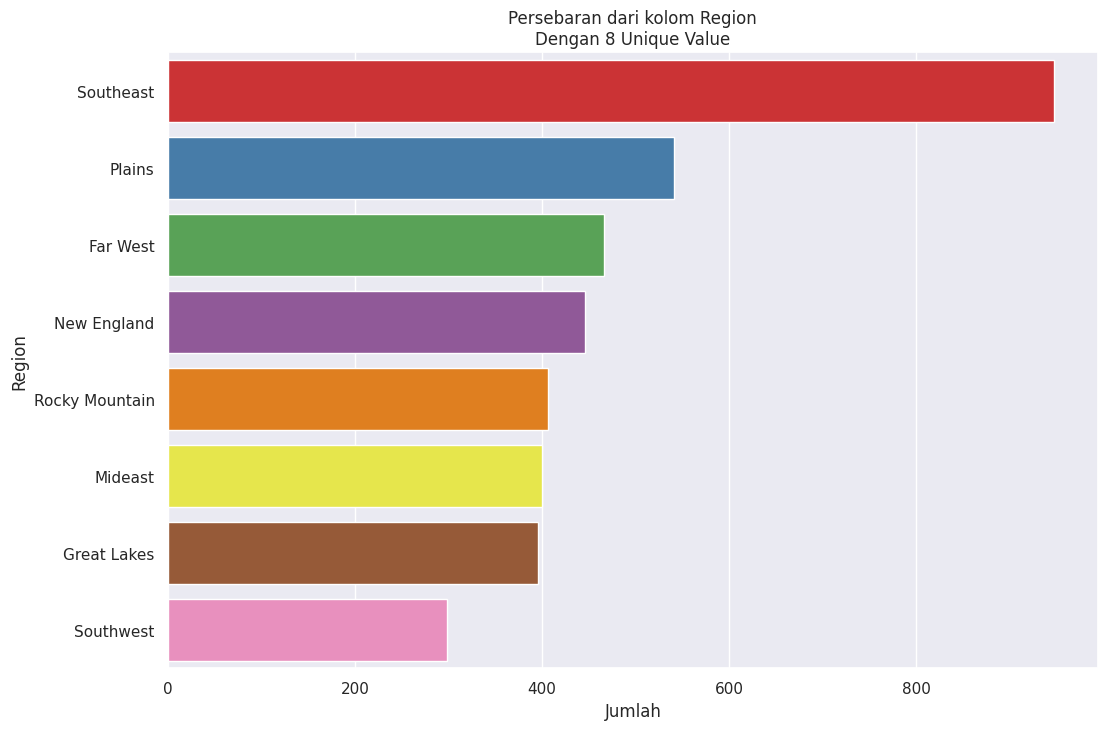

In [44]:
for column in object_columns:
    plt.figure(figsize=(12, 8))

    # Sorting the data for the current column
    sorted_data = data[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
    sorted_data = sorted_data.sort_values(by='count', ascending=False)

    ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")

    plt.title(f'Persebaran dari kolom {column}\nDengan {len(data[column].unique())} Unique Value')
    plt.xlabel('Jumlah')
    plt.ylabel(column)

    plt.show()

<ipython-input-45-a62a16dca3a4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")


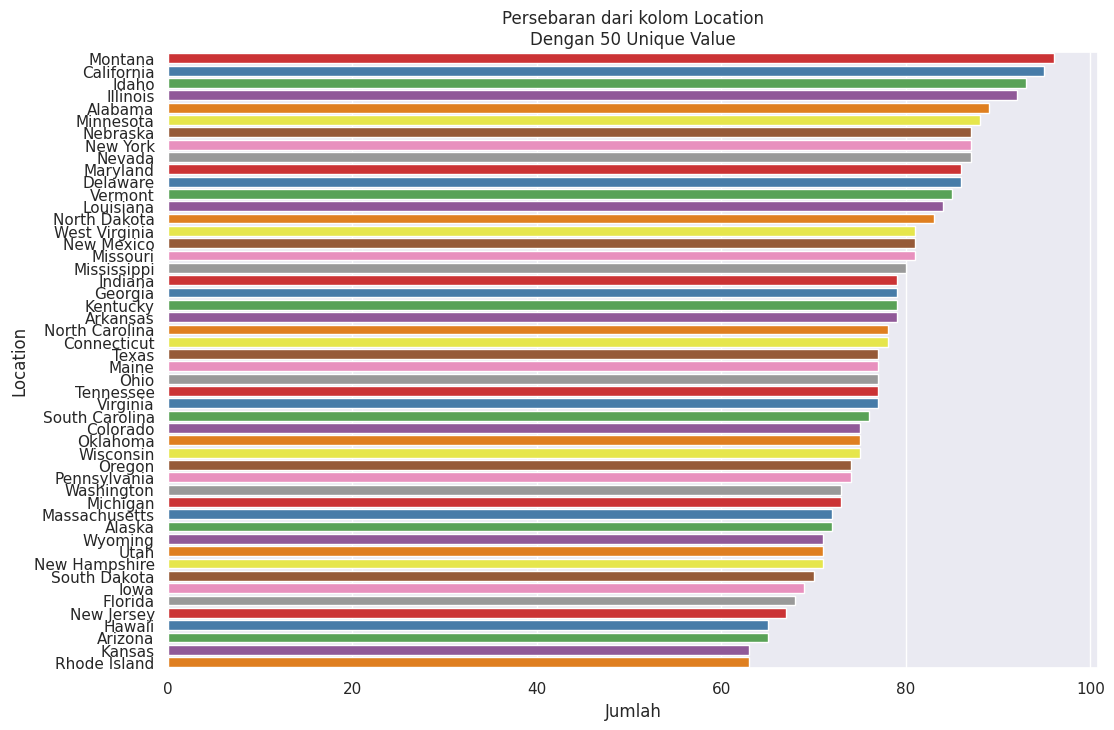

In [45]:
column = "Location"

plt.figure(figsize=(12, 8))

# Sorting the data for the current column
sorted_data = data[column].value_counts().reset_index().rename(columns={'index': column, column: 'count'})
sorted_data = sorted_data.sort_values(by='count', ascending=False)

ax = sns.countplot(y=column, data=data, order=sorted_data[column], palette="Set1")

plt.title(f'Persebaran dari kolom {column}\nDengan {len(data[column].unique())} Unique Value')
plt.xlabel('Jumlah')
plt.ylabel(column)

plt.show()

## Mari melihat persebaran dari kolom numerikal (Scatter Plot)

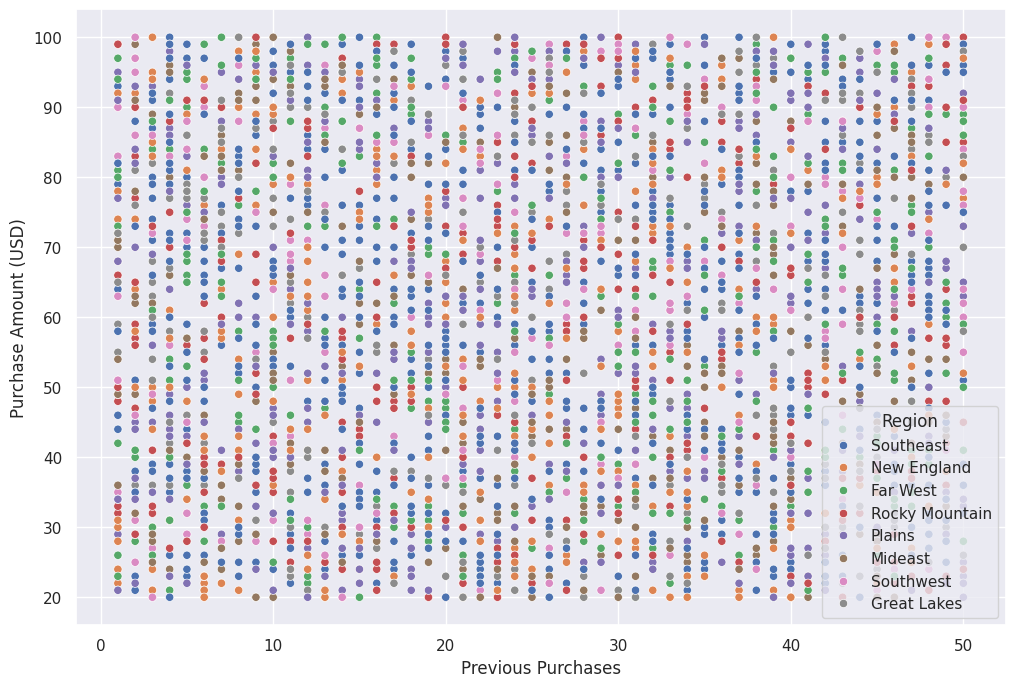

In [46]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Previous Purchases', y='Purchase Amount (USD)', hue="Region")
plt.show()

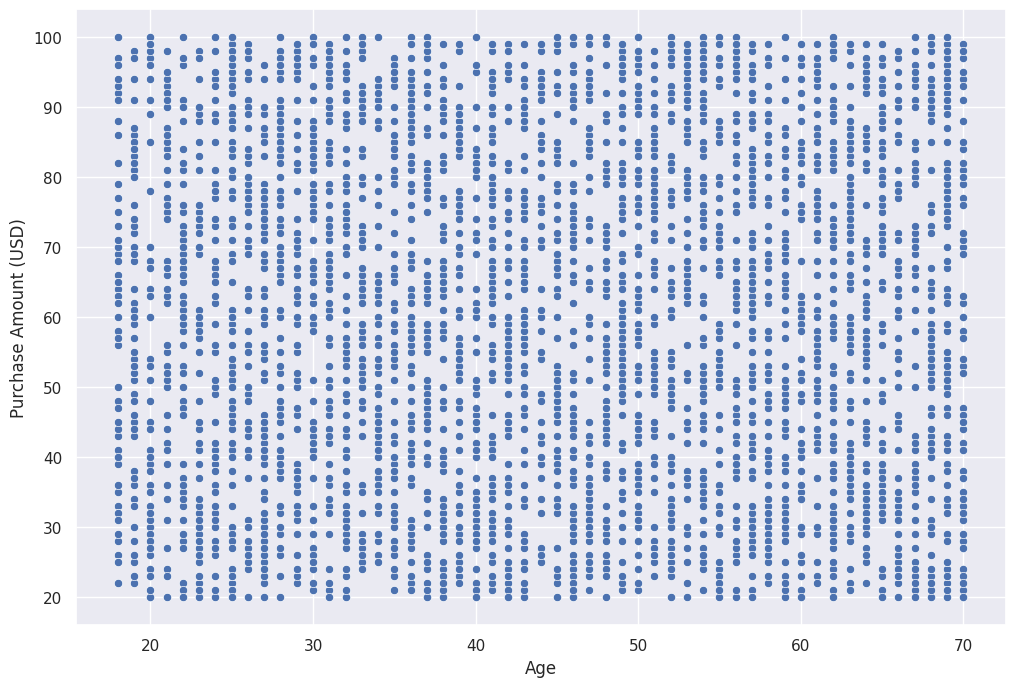

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='Age', y='Purchase Amount (USD)')
plt.show()

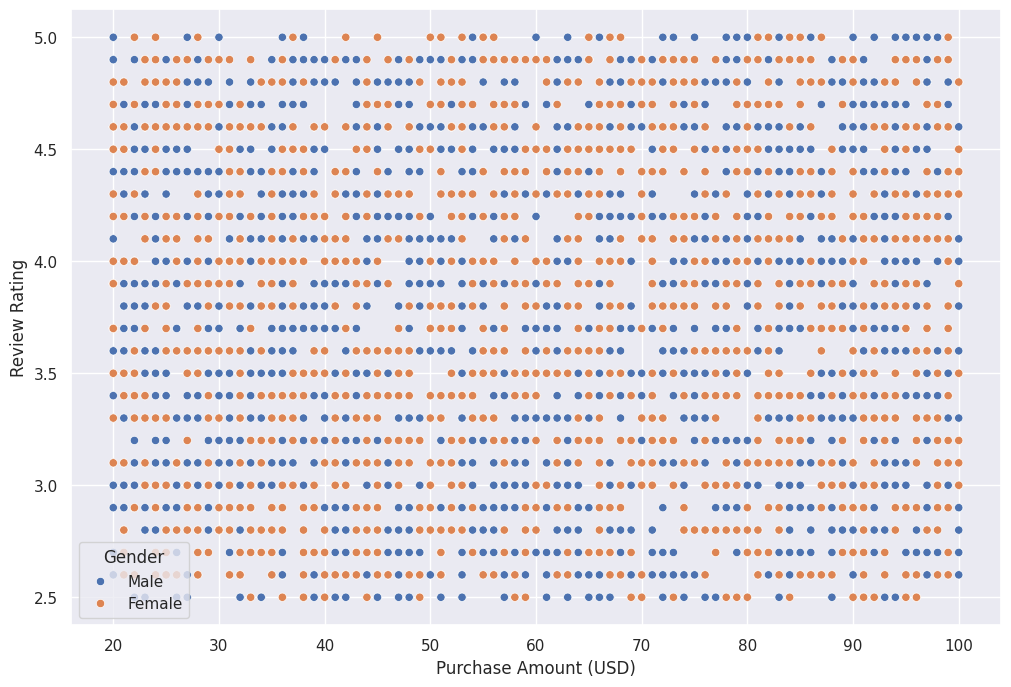

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, y='Review Rating', x='Purchase Amount (USD)', hue="Gender")
plt.show()

## Mari melihat dari densitas kolom numerikal berdasarkan berbagai hue(Density Plot)

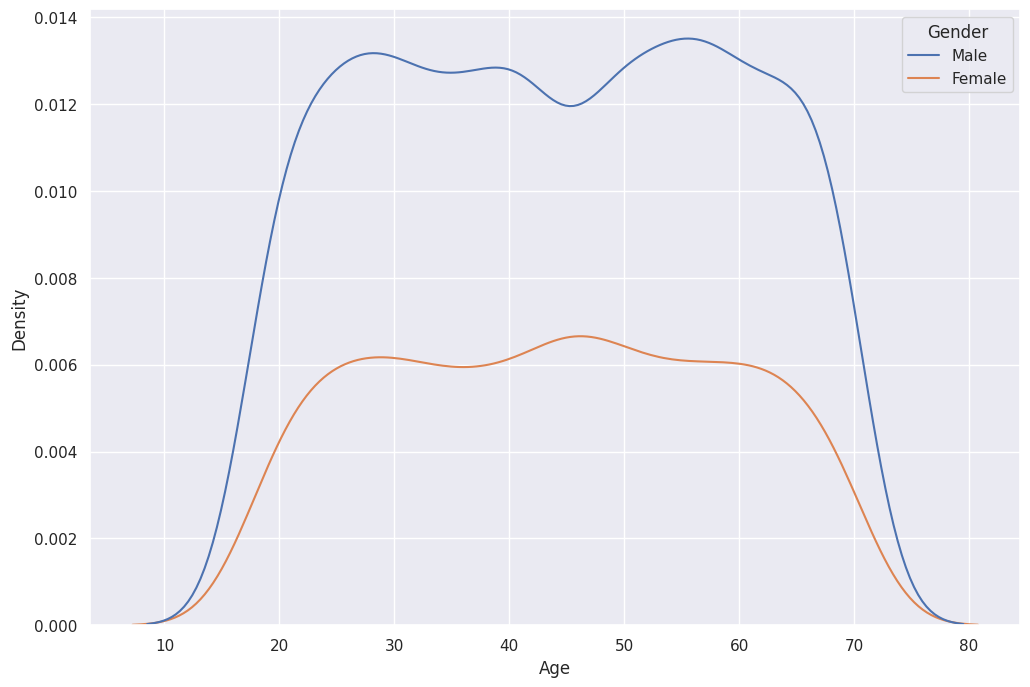

In [51]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x ='Age', hue='Gender')
plt.show()

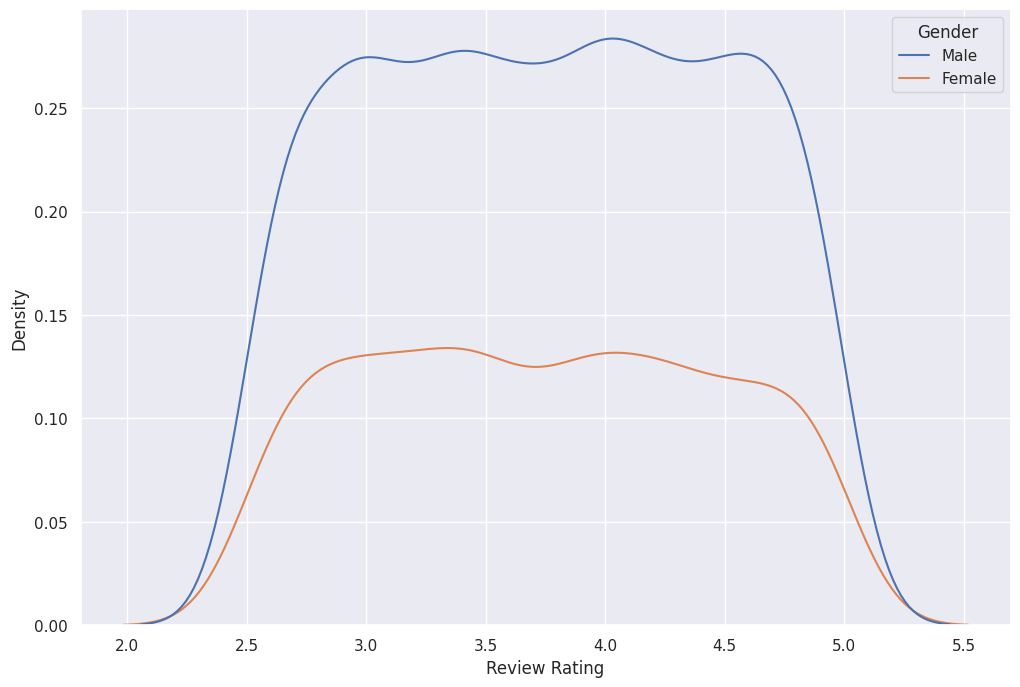

In [52]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x ='Review Rating', hue='Gender')
plt.show()

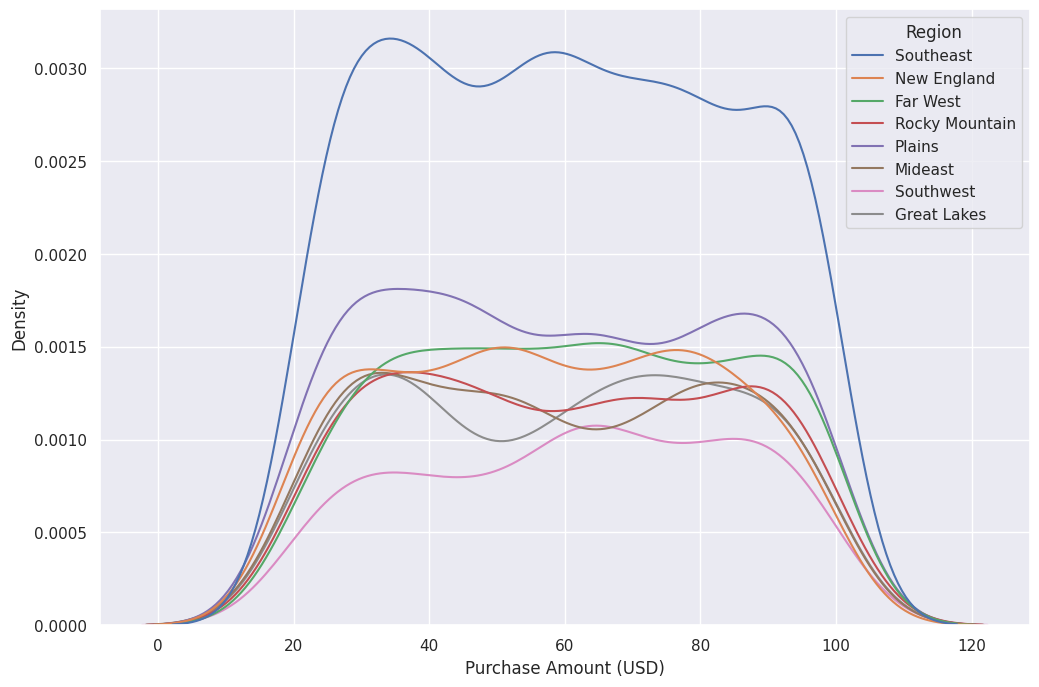

In [53]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x ='Purchase Amount (USD)', hue='Region')
plt.show()

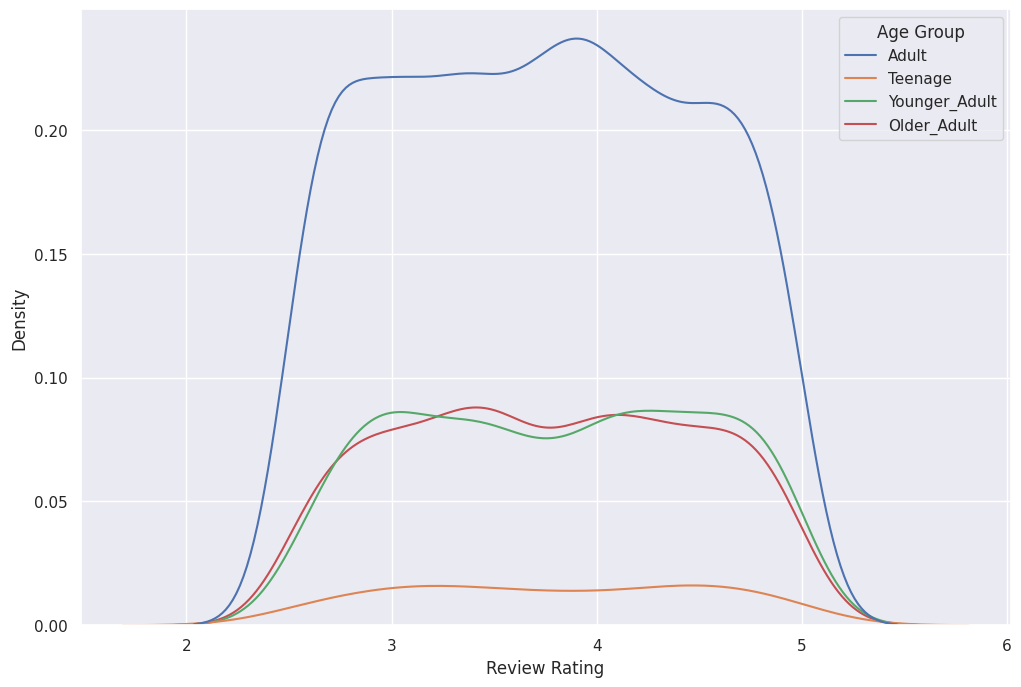

In [54]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x ='Review Rating', hue='Age Group')
plt.show()

## Melihat Violin Plot

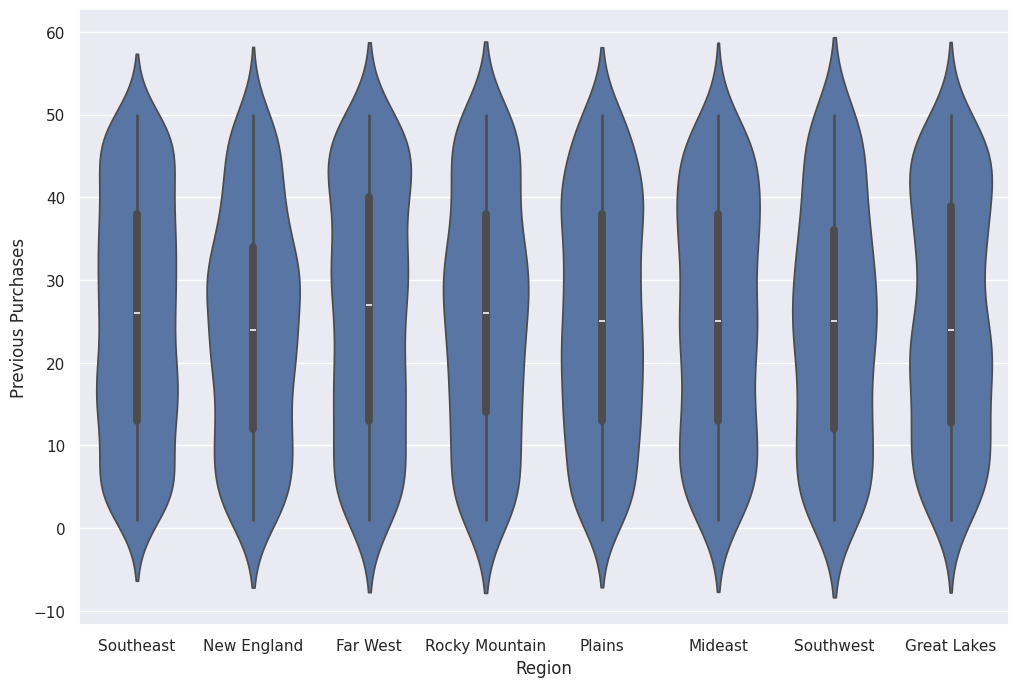

In [56]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data, y='Previous Purchases', x="Region")
plt.show()

<Figure size 2500x2500 with 0 Axes>

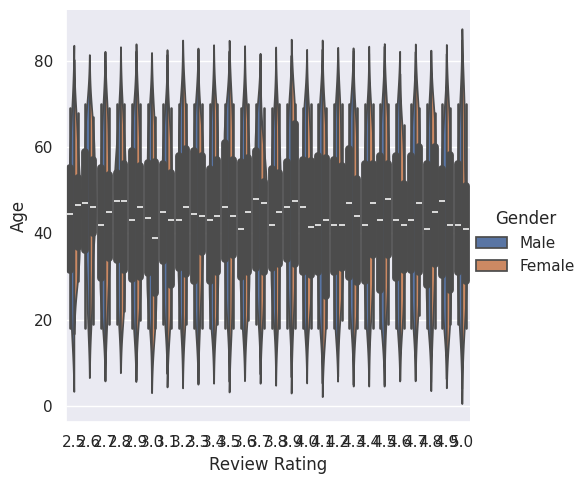

In [58]:
plt.figure(figsize=(25, 25))
sns.catplot(x="Review Rating", y="Age", hue="Gender", kind="violin", split=True, data=data)

## Melihat bagaimana hubungan kolom dengan kolom lainnya (Pair Plot)

<Figure size 2000x800 with 0 Axes>

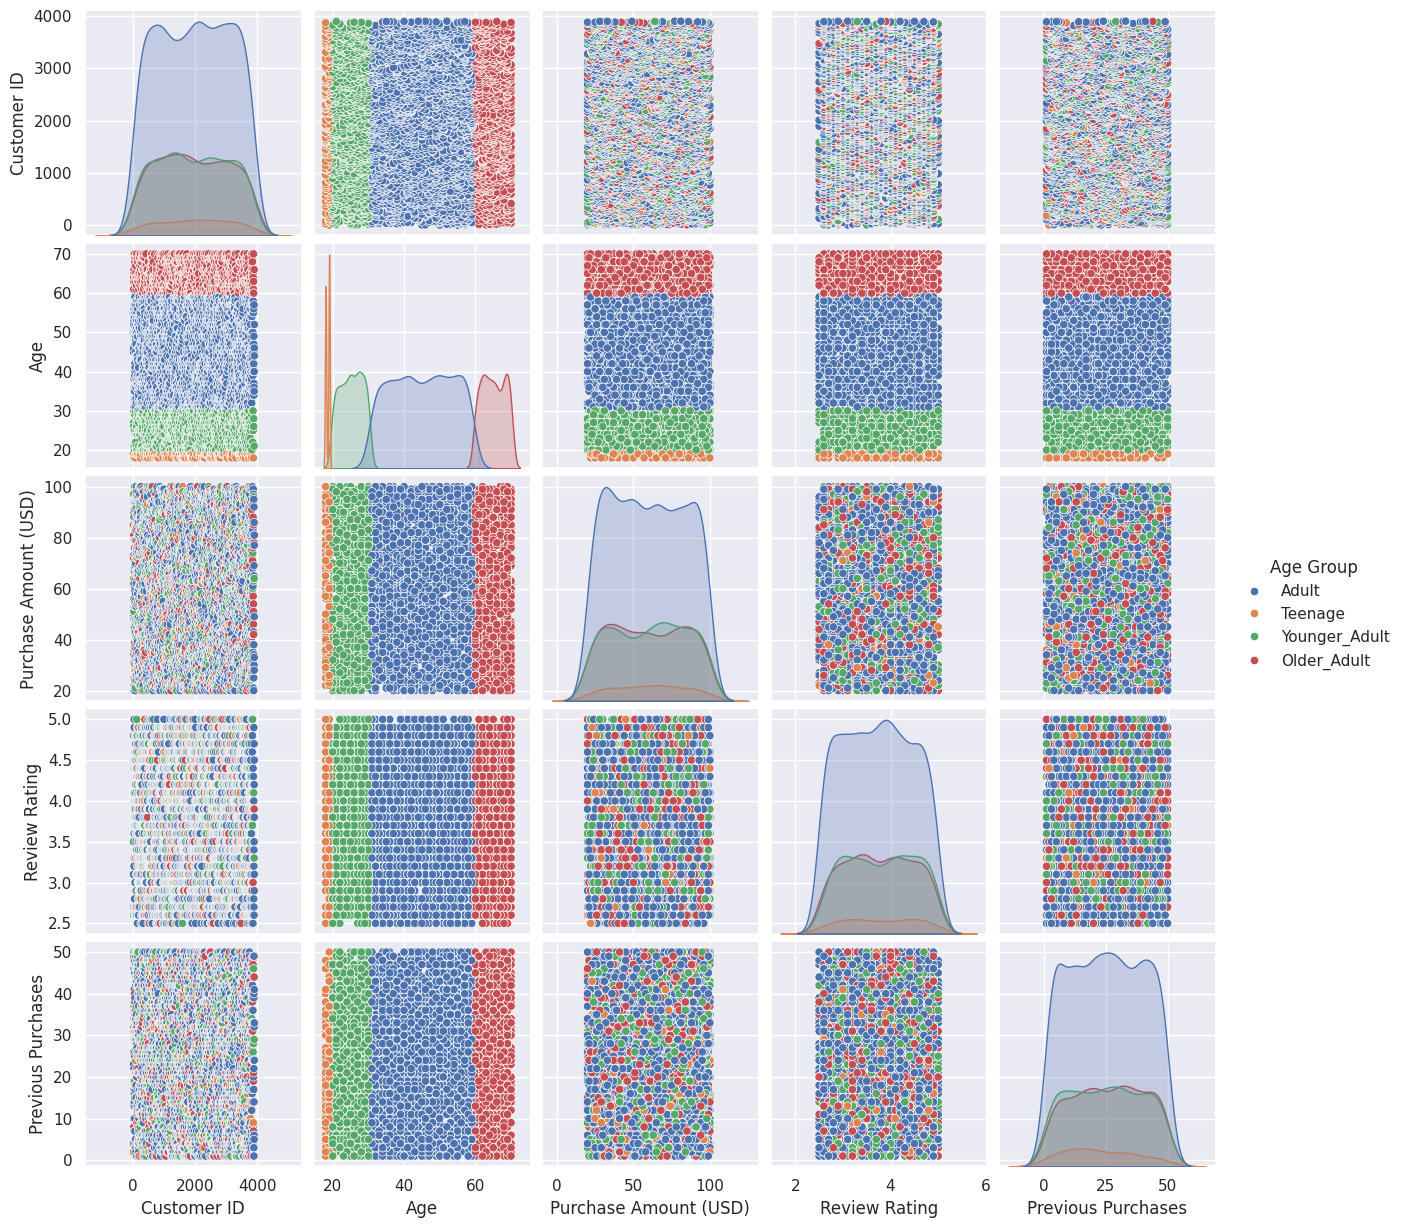

<Figure size 2000x800 with 0 Axes>

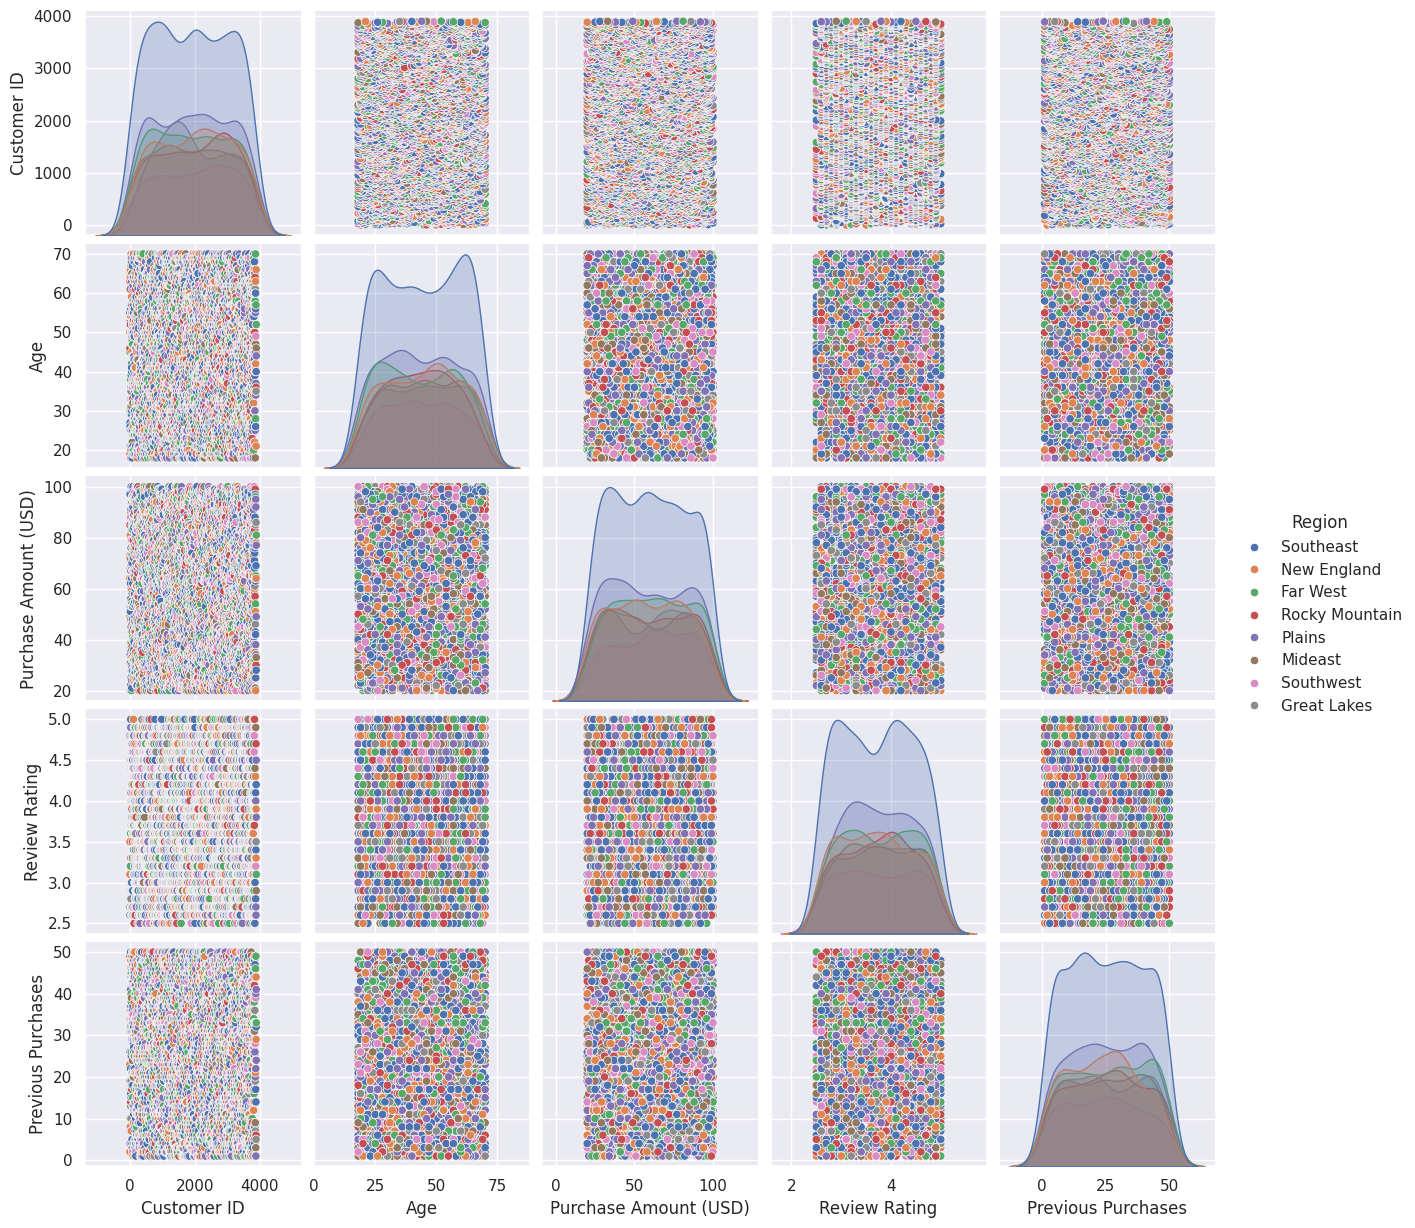

In [59]:
for column in ["Age Group", "Region"]:
  plt.figure(figsize=(20,8))
  sns.pairplot(data, hue=column, diag_kind="kde")
  plt.show()

## Pie Chart

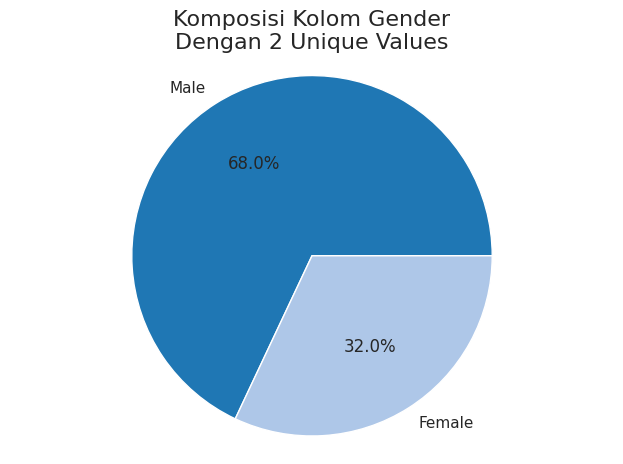

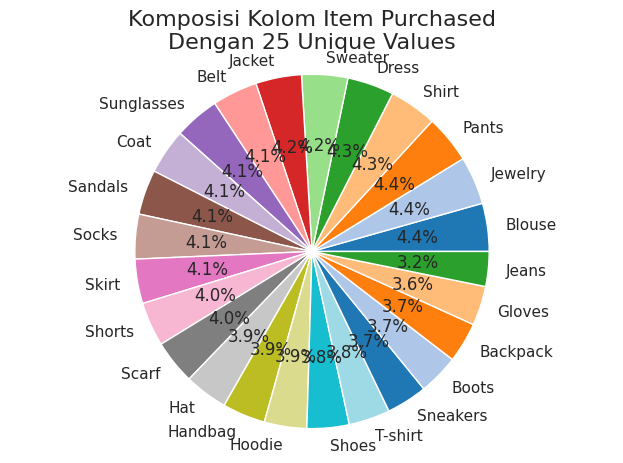

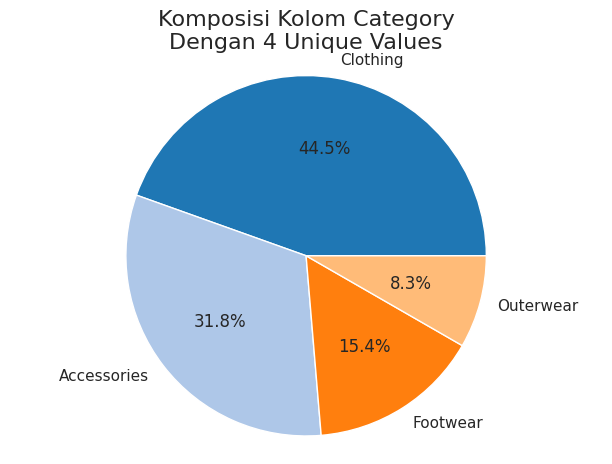

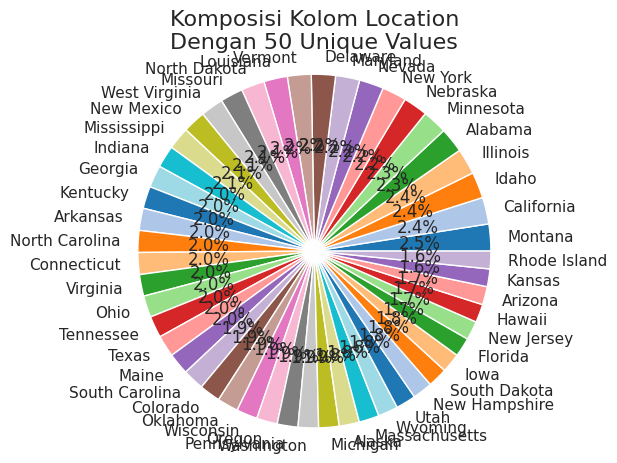

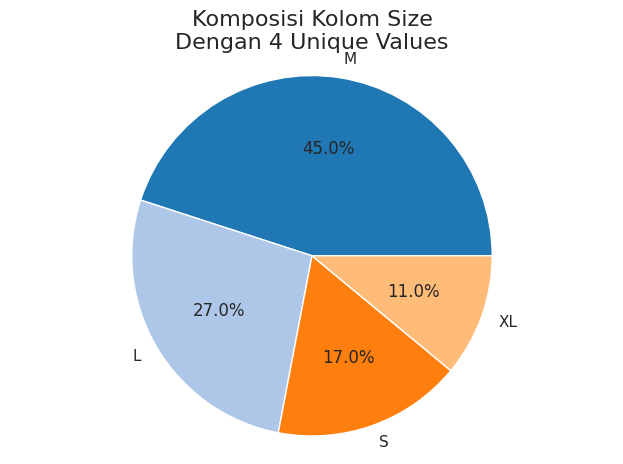

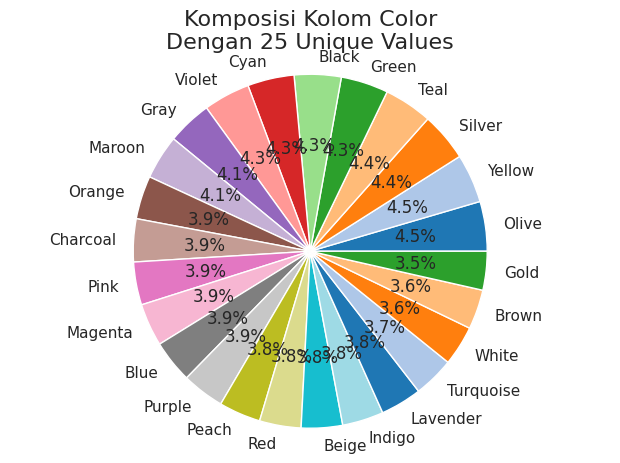

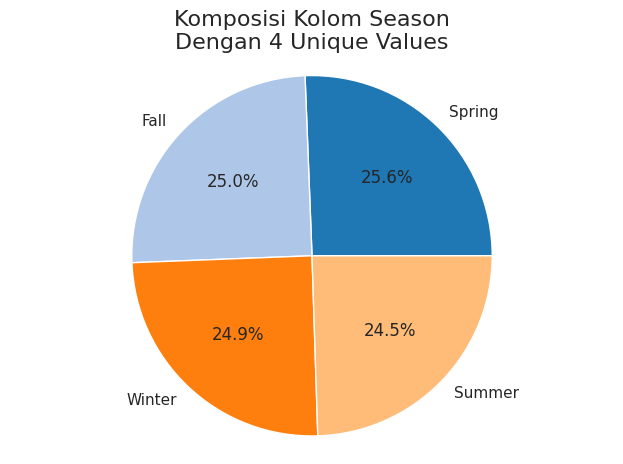

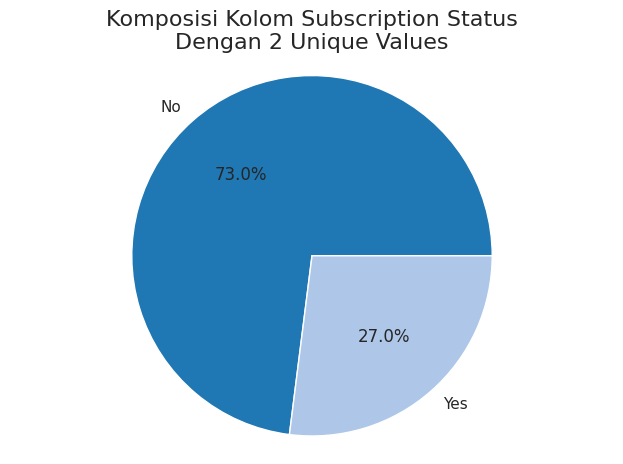

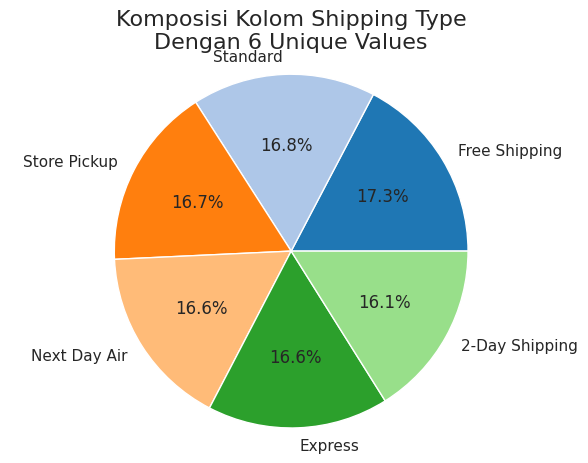

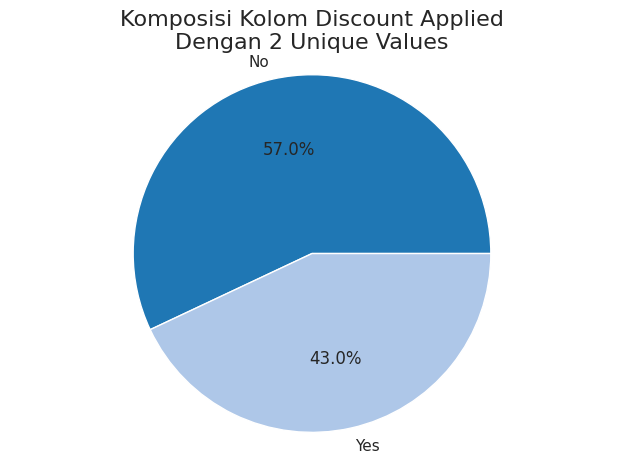

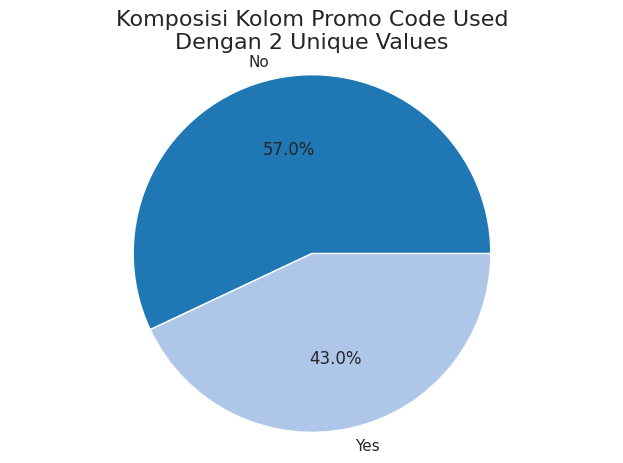

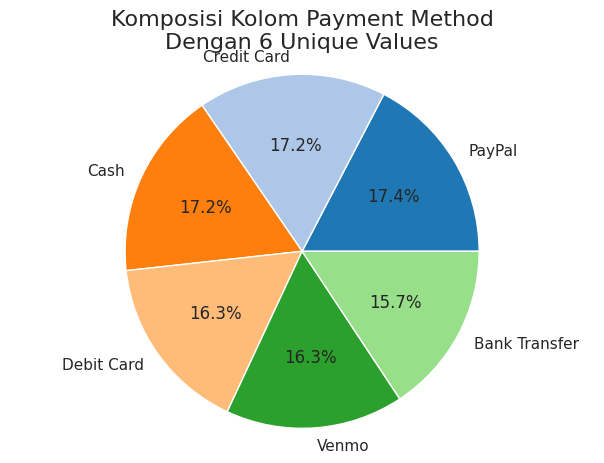

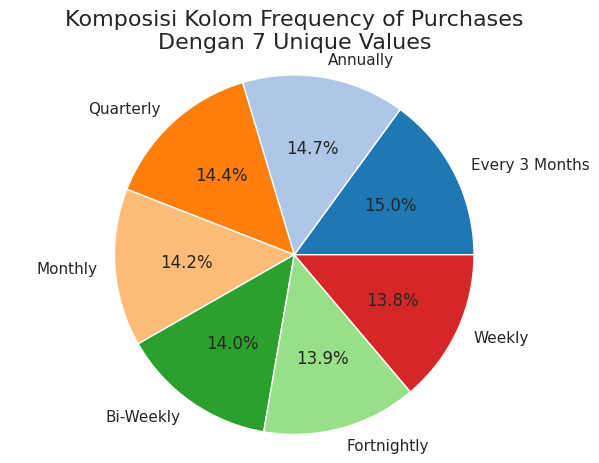

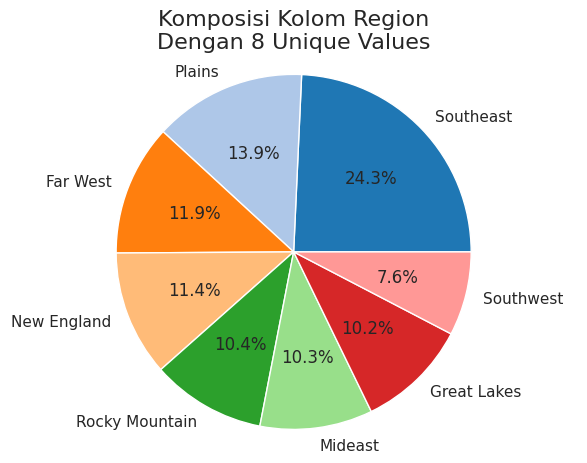

In [60]:
for column in object_columns:
  pie_data = data[column]
  # Hitung jumlah nilai unik
  unique_values = len(pie_data.unique())

  # Hitung frekuensi setiap nilai
  value_counts = pie_data.value_counts()

  # Persiapkan warna
  colors = plt.cm.tab20.colors[:unique_values]

  # Buat plot pie dengan bagian tengah bolong
  plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%')

  # Tambahkan tulisan
  plt.title(f'Komposisi Kolom {column}\nDengan {unique_values} Unique Values', fontsize=16)
  plt.axis('equal')  # Supaya plot menjadi lingkaran
  plt.tight_layout()

  # Tampilkan plot
  plt.show()

## Melihat Hubungan antara Kolom Penting (Sankey Diagram)

In [62]:
!pip install pySankey

In [63]:
import pandas as pd

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

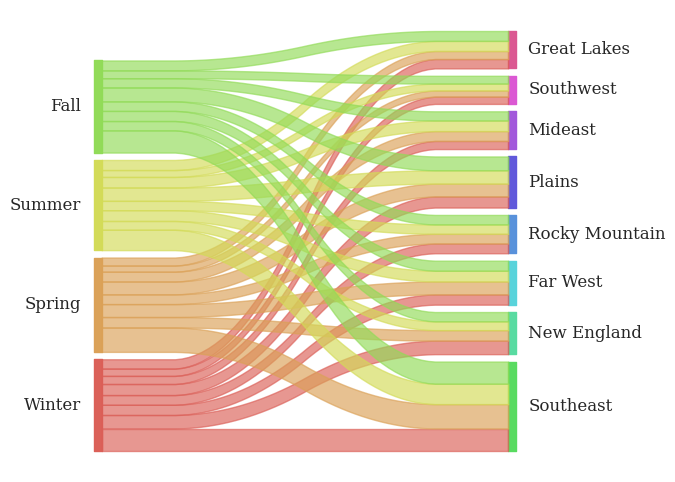

In [67]:
sankey(data["Season"], data["Region"], aspect=20, fontsize=12)

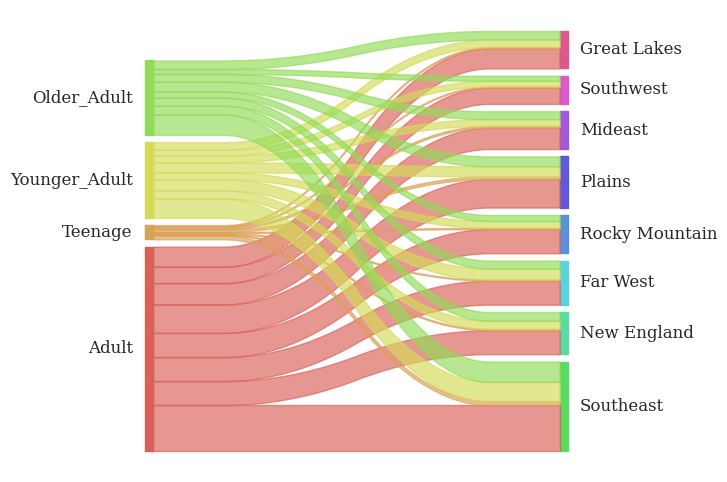

In [66]:
sankey(data["Age Group"], data["Region"], aspect=20, fontsize=12)

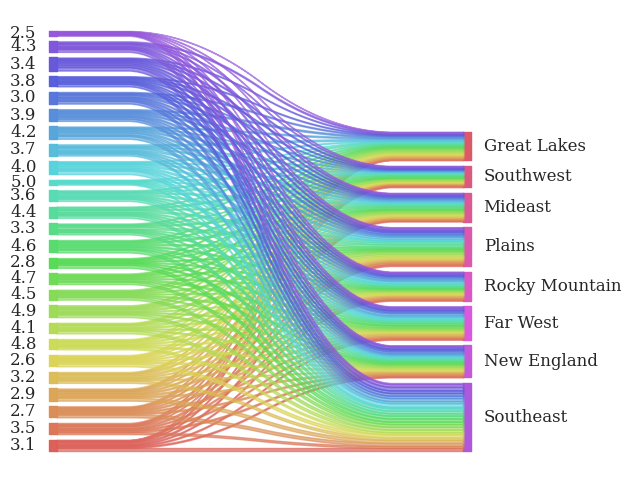

In [65]:
sankey(data["Review Rating"], data["Region"], aspect=20, fontsize=12)

## Persebaran Customer di Amerika Map (Failed)

In [ ]:
# pip install wget

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FuncFormatter
# import matplotlib.colors as mcolors
# import seaborn as sns
# import geopandas as gpd
# from shapely.geometry import Polygon
# import missingno as msno
# import os
# import wget
# import openpyxl
# import math

Mendapatkan dataset terlebih dahulu

In [ ]:
# filtered_data = data.filter(["Location", "Purchase Amount (USD)"])
# filtered_data.head()

In [ ]:
# wget.download("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

In [ ]:
# gdf = gpd.read_file('/content/')

In [ ]:
# gdf.head()

In [ ]:
# gdf = gdf.merge(filtered_data, left_on='NAME',right_on='Location')

In [ ]:
# gdf.head()

In [ ]:
# gdf.plot()

In [ ]:
# alaska_gdf = gdf[gdf.NAME =='Alaska']

In [ ]:
# hawaii_gdf = gdf[gdf.NAME=='Hawaii']

In [ ]:
# alaska_gdf.plot()

In [ ]:
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))



# # NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
# polygon = Polygon([(-175,50),(-175,72),(-140, 72),(-140,50)])
# # polygon = Polygon([(-180,0),(-180,90),(-120,90),(-120,0)])

# # polygon=hipolygon
# poly_gdf = gpd.GeoDataFrame( geometry=[polygon], crs=world.crs)

# fig, ax1 = plt.subplots(1, figsize=(8, 18))
# world.plot(ax=ax1)
# poly_gdf.boundary.plot(ax = ax1, color="red")
# ax1.set_title("The red polygon can be used to clip Alaska's western islands", fontsize=20)
# ax1.set_axis_off()
# plt.show()

In [ ]:
# polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
# # apply1(alaska_gdf,0,36)
# alaska_gdf.clip(polygon).plot( color='lightblue', linewidth=0.8, edgecolor='0.8')
# # alaska_gdf.clip(polygon).plot(column=variable, cmap = colormap, linewidth=0.8,ax=akax, edgecolor='0.8')

In [ ]:
# hawaii_gdf.plot()

In [ ]:
# hipolygon = Polygon([(-161,0),(-161,90),(-120,90),(-120,0)])
# hawaii_gdf.clip(hipolygon).plot(color='lightblue', linewidth=0.8, edgecolor='0.8')

In [ ]:
# # Create a "copy" of gdf for re-projecting
# visframe = gdf.to_crs({'init':'epsg:2163'})

# # create figure and axes for with Matplotlib for main map
# fig, ax = plt.subplots(1, figsize=(18, 14))
# # remove the axis box from the main map
# ax.axis('off')


# # create map of all states except AK and HI in the main map axis
# visframe[~visframe.NAME.isin(['Hawaii','Alaska'])].plot(color='lightblue', linewidth=0.8, ax=ax, edgecolor='0.8')


# # Add Alaska Axis (x, y, width, height)
# akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])


# # Add Hawaii Axis(x, y, width, height)
# hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])

# # We'll later map Alaska in "akax" and Hawaii in "hiax"

In [ ]:
# gdf["Purchase Amount (USD)"].describe()

In [ ]:
# # Apply this the gdf to ensure that all states are assigned colors by the same function
# def makeColorColumn(gdf,variable,vmin,vmax):
#     # apply a function to a column to create a new column of assigned colors & return full frame
#     norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
#     mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
#     gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
#     return gdf

In [ ]:
# # **************************
# # set the value column that will be visualised
# variable = 'Purchase Amount (USD)'

# # make a column for value_determined_color in gdf
# # set the range for the choropleth values with the upper bound the rounded up maximum value
# vmin, vmax = gdf["Purchase Amount (USD)"].min(), gdf["Purchase Amount (USD)"].max() #math.ceil(gdf.pct_food_insecure.max())
# # Choose the continuous colorscale "YlOrBr" from https://matplotlib.org/stable/tutorials/colors/colormaps.html
# colormap = "YlOrBr"
# gdf = makeColorColumn(gdf,variable,vmin,vmax)

# # create "visframe" as a re-projected gdf using EPSG 2163
# visframe = gdf.to_crs({'init':'epsg:2163'})



# # create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(18, 14))
# # remove the axis box around the vis
# ax.axis('off')

# # set the font for the visualization to Arial
# # hfont = {'fontname':'Times New Roman'}

# # add a title and annotation
# ax.set_title('Food Insecurity by Percentage of State Households\n2019-2021', fontdict={'fontsize': '42', 'fontweight' : '1'})

# # Create colorbar legend
# fig = ax.get_figure()
# # add colorbar axes to the figure
# # This will take some iterating to get it where you want it [l,b,w,h] right
# # l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
# cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])

# cbax.set_title('Percentage of state households\nexperiencing food insecurity\n', fontdict={'fontsize': '15', 'fontweight' : '0'})

# # add color scale
# sm = plt.cm.ScalarMappable(cmap=colormap, \
#                  norm=plt.Normalize(vmin=vmin, vmax=vmax))
# # reformat tick labels on legend
# sm._A = []
# comma_fmt = FuncFormatter(lambda x, p: format(x/100, '.0%'))
# fig.colorbar(sm, cax=cbax, format=comma_fmt)
# tick_font_size = 16
# cbax.tick_params(labelsize=tick_font_size)
# ax.annotate("Data: USDA Economic Research Service, accessed 15 Jan 23\nhttps://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/#map", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')


# # create map
# # Note: we're going state by state here because of unusual coloring behavior when trying to plot the entire dataframe using the "value_determined_color" column
# for row in visframe.itertuples():
#     if row.NAME not in ['Alaska', 'Hawaii']:
#         vf = visframe[visframe.NAME==row.NAME]
#         c = gdf[gdf.NAME==row.NAME][0:1].value_determined_color.item()
#         vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='0.8')



# # add Alaska
# akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])
# akax.axis('off')
# # polygon to clip western islands
# polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
# alaska_gdf = gdf[gdf.NAME=='Alaska']
# alaska_gdf.clip(polygon).plot(color=gdf[gdf.NAME=='Alaska'].value_determined_color, linewidth=0.8,ax=akax, edgecolor='0.8')


# # add Hawaii
# hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
# hiax.axis('off')
# # polygon to clip western islands
# hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
# hawaii_gdf = gdf[gdf.NAME=='Hawaii']
# hawaii_gdf.clip(hipolygon).plot(column=variable, color=hawaii_gdf['value_determined_color'], linewidth=0.8,ax=hiax, edgecolor='0.8')



# fig.savefig('/content/',dpi=400, bbox_inches="tight")
# # bbox_inches="tight" keeps the vis from getting cut off at the edges in the saved png
# # dip is "dots per inch" and controls image quality.  Many scientific journals have specifications for this
# # https://stackoverflow.com/questions/16183462/saving-images-in-python-at-a-very-high-quality

In [ ]:
# pip install basemap

In [ ]:
# from __future__ import (absolute_import, division, print_function)

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap
# from matplotlib.colors import rgb2hex, Normalize
# from matplotlib.patches import Polygon
# from matplotlib.colorbar import ColorbarBase

# fig, ax = plt.subplots()

# # Lambert Conformal map of lower 48 states.
# m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
#             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# # Mercator projection, for Alaska and Hawaii
# m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
#             projection='merc',lat_ts=20)  # do not change these numbers

# #%% ---------   draw state boundaries  ----------------------------------------
# ## data from U.S Census Bureau
# ## http://www.census.gov/geo/www/cob/st2000.html
# shp_info = m.readshapefile('cb_2018_us_state_500k','state',drawbounds=True,
#                            linewidth=0.45,color='gray')
# shp_info_ = m_.readshapefile('cb_2018_us_state_500k','state',drawbounds=False)

# ## population density by state from
# ## http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
# popdensity = {
# 'New Jersey':  438.00,
# 'Rhode Island':   387.35,
# 'Massachusetts':   312.68,
# 'Connecticut':	  271.40,
# 'Maryland':   209.23,
# 'New York':    155.18,
# 'Delaware':    154.87,
# 'Florida':     114.43,
# 'Ohio':	 107.05,
# 'Pennsylvania':	 105.80,
# 'Illinois':    86.27,
# 'California':  83.85,
# 'Hawaii':  72.83,
# 'Virginia':    69.03,
# 'Michigan':    67.55,
# 'Indiana':    65.46,
# 'North Carolina':  63.80,
# 'Georgia':     54.59,
# 'Tennessee':   53.29,
# 'New Hampshire':   53.20,
# 'South Carolina':  51.45,
# 'Louisiana':   39.61,
# 'Kentucky':   39.28,
# 'Wisconsin':  38.13,
# 'Washington':  34.20,
# 'Alabama':     33.84,
# 'Missouri':    31.36,
# 'Texas':   30.75,
# 'West Virginia':   29.00,
# 'Vermont':     25.41,
# 'Minnesota':  23.86,
# 'Mississippi':	 23.42,
# 'Iowa':	 20.22,
# 'Arkansas':    19.82,
# 'Oklahoma':    19.40,
# 'Arizona':     17.43,
# 'Colorado':    16.01,
# 'Maine':  15.95,
# 'Oregon':  13.76,
# 'Kansas':  12.69,
# 'Utah':	 10.50,
# 'Nebraska':    8.60,
# 'Nevada':  7.03,
# 'Idaho':   6.04,
# 'New Mexico':  5.79,
# 'South Dakota':	 3.84,
# 'North Dakota':	 3.59,
# 'Montana':     2.39,
# 'Wyoming':      1.96,
# 'Alaska':     0.42}

# #%% -------- choose a color for each state based on population density. -------
# colors={}
# statenames=[]
# cmap = plt.cm.hot_r # use 'reversed hot' colormap
# vmin = 0; vmax = 450 # set range.
# norm = Normalize(vmin=vmin, vmax=vmax)
# for shapedict in m.state_info:
#     statename = shapedict['NAME']
#     # skip DC and Puerto Rico.
#     if statename not in ['District of Columbia','Puerto Rico']:
#         pop = popdensity[statename]
#         # calling colormap with value between 0 and 1 returns
#         # rgba value.  Invert color range (hot colors are high
#         # population), take sqrt root to spread out colors more.
#         colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
#     statenames.append(statename)

# #%% ---------  cycle through state names, color each one.  --------------------
# for nshape,seg in enumerate(m.states):
#     # skip DC and Puerto Rico.
#     if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
#         color = rgb2hex(colors[statenames[nshape]])
#         poly = Polygon(seg,facecolor=color,edgecolor=color)
#         ax.add_patch(poly)

# AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
# AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
# AK_SCALE = 0.19  # scale down Alaska to show as a map inset
# HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
# HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
# AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
# AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

# for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
#     if shapedict['NAME'] in ['Alaska', 'Hawaii']:
#         seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
#         if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
#             seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
#             color = rgb2hex(colors[statenames[nshape]])
#         elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
#             seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
#                    for x, y in seg]
#             color = rgb2hex(colors[statenames[nshape]])
#         poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
#         ax.add_patch(poly)

# ax.set_title('United states population density by state')

# #%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
# light_gray = [0.8]*3  # define light gray color RGB
# x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
# x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
# m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
# m_.plot(x2,y2,color=light_gray,linewidth=0.8)

# #%% ---------   Show color bar  ---------------------------------------
# ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
# cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
#                   label=r'[population per $\mathregular{km^2}$]')

# plt.show()

In [ ]:
# for nshape,seg in enumerate(m.states):
#     # skip DC and Puerto Rico.
#     if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
#     # Offset Alaska and Hawaii to the lower-left corner.
#         if statenames[nshape] == 'Alaska':
#         # Alaska is too big. Scale it down to 35% first, then transate it.
#             seg = list(map(lambda (x,y): (0.35*x + 1100000, 0.35*y-1300000), seg))
#         if statenames[nshape] == 'Hawaii':
#             seg = list(map(lambda (x,y): (x + 5100000, y-900000), seg))

#         color = rgb2hex(colors[statenames[nshape]])
#         poly = Polygon(seg,facecolor=color,edgecolor=color)
#         ax.add_patch(poly)